#**Road** **Accident** **Severity** **Classification**

## Goal of the Data
  Analyse road traffic accident data to reduce the frequency and severity of accidents. Develop insights to improve road safety measures and traffic management systems.
## Description of Dataset
  This data set is collected from Addis Ababa Sub city police departments for Master's research work. The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally, it has 32 features and 12316 instances of the accident.Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.
## About the Data
  The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. You metric for evaluation will be f1-score.

https://www.kaggle.com/datasets/samikshakolhe/rta-dataset-addis-ababa-subcity

# Libraries

In [309]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

# Reading and understanding the data

In [310]:
data=pd.read_csv("/content/RTA Dataset.csv")
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [311]:
# shape of the data
data.shape

(12316, 32)

In [312]:
# Displays first 10 rows
data.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [313]:
# Displays last 10 rows
data.tail(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12306,17:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,1-2yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
12307,17:10:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Governmental,Below 1yr,...,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
12308,17:10:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,NaN,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
12309,09:05:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
12310,09:05:00,Friday,18-30,Male,NaN,Employee,NaN,Special vehicle,Owner,Above 10yr,...,Reversing,Passenger,Male,Over 51,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [314]:
# Displays 5 samples
data.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8536,13:40:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Taxi,Governmental,NaN,...,Reversing,Pedestrian,Male,31-50,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
5694,08:10:00,Monday,18-30,Male,Junior high school,Employee,Below 1yr,Public (12 seats),Owner,Unknown,...,Going straight,na,na,na,na,NaN,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9297,16:55:00,Friday,Over 51,Male,Elementary school,Employee,5-10yr,Stationwagen,NaN,NaN,...,Other,Pedestrian,Female,18-30,3,Driver,Normal,Unknown or other,Changing lane to the right,Serious Injury
10565,07:00:00,Thursday,18-30,Male,NaN,NaN,NaN,NaN,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
11029,20:46:00,Saturday,18-30,Male,Elementary school,Owner,NaN,NaN,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [315]:
# Displays basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [316]:
# Displays summary statistics
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [317]:
data.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


#Visualizations of the features

##Date&Time

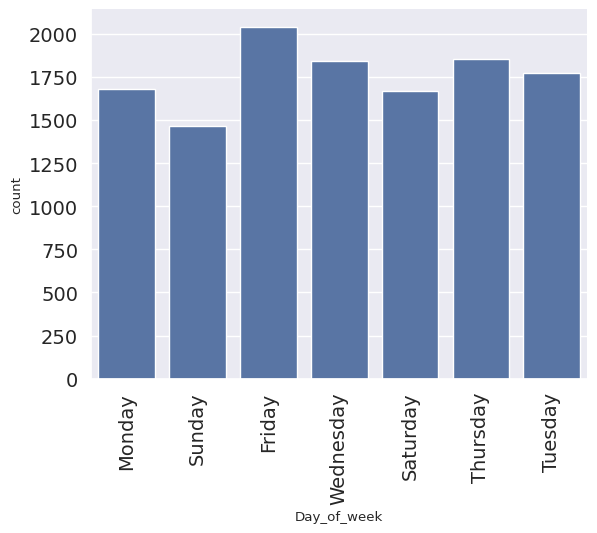

In [318]:
cp=sns.countplot(x=data['Day_of_week'])
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

In [319]:
valuecounts=data['Time'].value_counts()
valuecounts

,count
Time,
15:30:00,120
17:10:00,110
18:30:00,103
11:30:00,99
17:00:00,98
...,...
00:52:00,1
04:49:00,1
14:31:00,1


In [320]:
# Feature Engineering
def formatTimeCol(t):
  t=t[:2]
  if ":" in t:
    t=t[:1]
  return int(t)
def categorizeTimeCol(t):
  if t >= 8 and t < 17:
    return "Day"
  else:
    return "Night"
data['Time']=data['Time'].apply(lambda x: formatTimeCol(x))
data['Time']=data['Time'].apply(lambda x: categorizeTimeCol(x))
data['Time'].value_counts(dropna=False)

,count
Time,
Day,6387
Night,5929


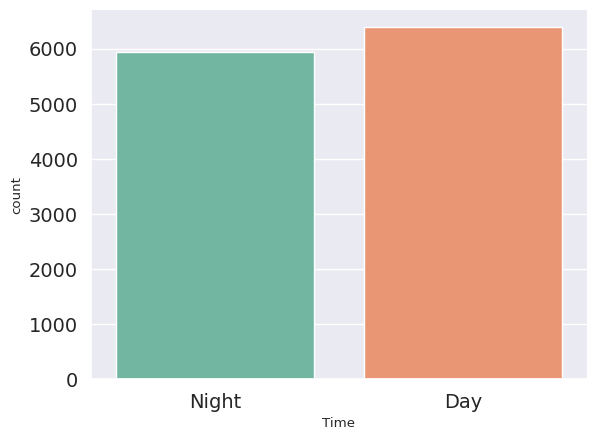

In [321]:
sns.countplot(x=data['Time'],hue=data['Time'],palette='Set2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

Inference on Time:
* Most of the accidents occured on friday
* Occured at Day time 8AM and 5PM (office & school hours)
* Sunday has less number of accidents

##Driver

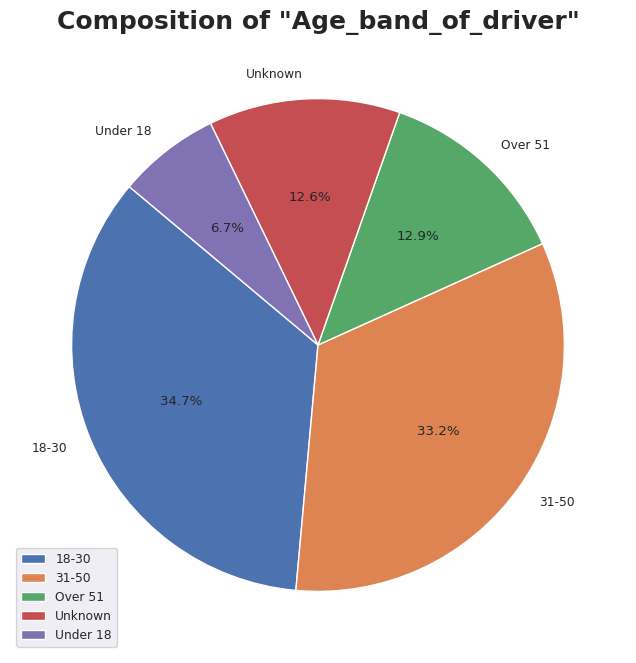

In [322]:
age_band_count=data['Age_band_of_driver'].value_counts()
plt.figure(figsize=(10,8))
fig_1=plt.pie(age_band_count,labels=age_band_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Composition of "Age_band_of_driver"',fontsize=18,fontweight='bold')
plt.legend(loc='best')
plt.show()

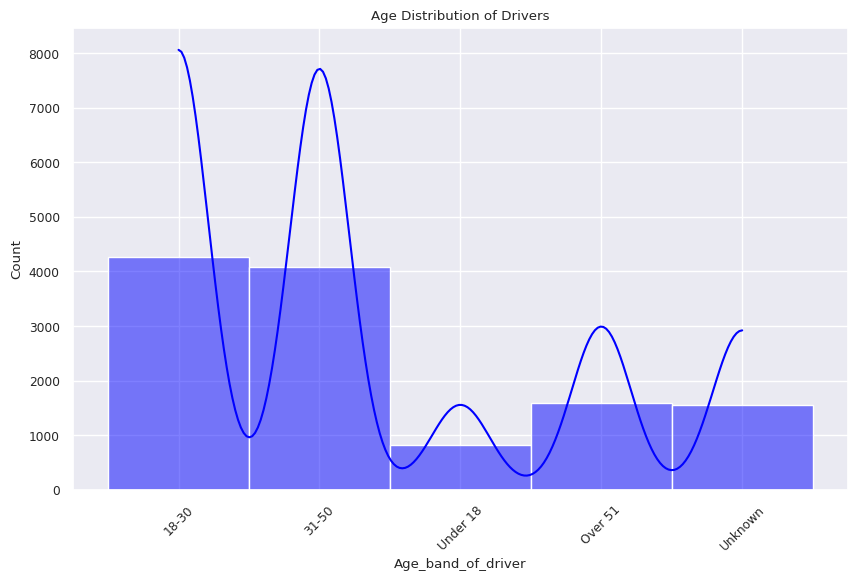

In [323]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age_band_of_driver'],kde=True,bins=10,color='blue')
plt.title('Age Distribution of Drivers')
plt.xticks(rotation=45)
plt.show()

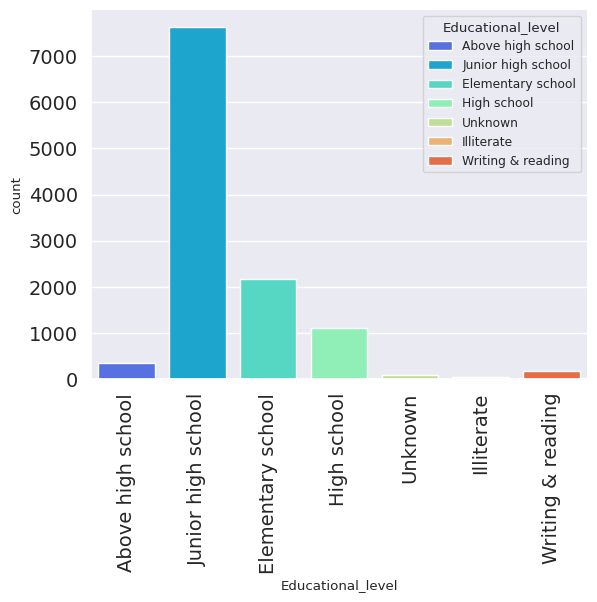

In [324]:
sns.countplot(x=data['Educational_level'],hue=data['Educational_level'],palette='rainbow')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

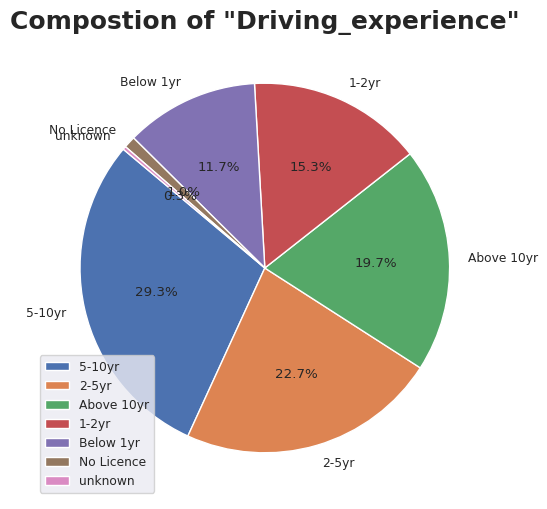

In [325]:
Driving_experience=data['Driving_experience'].value_counts()
plt.figure(figsize=(8,6))
fig_1=plt.pie(Driving_experience,labels=Driving_experience.index,autopct='%1.1f%%',startangle=140)
plt.title('Compostion of "Driving_experience"',fontsize=18,fontweight='bold')
plt.legend(loc='best')
plt.show()

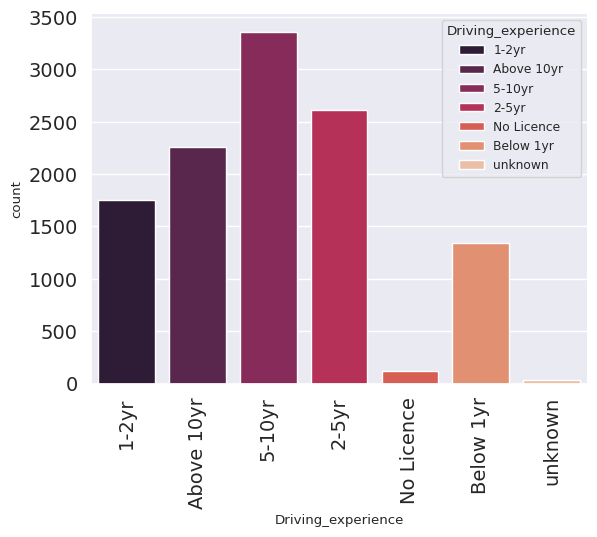

In [326]:
sns.countplot(x=data['Driving_experience'],hue=data['Driving_experience'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

In [327]:
data['Owner_of_vehicle'].value_counts()

,count
Owner_of_vehicle,
Owner,10459
Governmental,1041
Organization,312
Other,22


Inference on Driver's features:
  * Most of the drivers are male between 18-30 age group and with 5-10 yrs of driving experience.
  * **Number of RTAs by Gender of Drivers:-** In terms of gender, male drivers have been the main cause of traffic accidents by taking 88% of accidents. However, in the current data collection or data gained from the Addis Ababa Traffic Police Commission data, there is no information on the number of vehicles driven by males and females in Addis Ababa.
  * Majority of the drivers who got accident are employees.
  * **Number of RTAs by Driving Experience of the Driver:-** From this, it can be seen that experienced drivers are not only experienced in high-risk accidents but also in terms of human behaviour. There are also reports of accidents involving unlicensed drivers, who are in violation of the law and endager lives and property.
  * **Road RTAs by the Educational Level of Drivers:-** According to the data, the highest number of the accident reported at the junior high school educational level of drivers. In this comparison, the risk of most drivers at this education level is related to the problems we have seen in the age group. This does not mean that all drivers at this level of education are in their teens, but they do take part.
  * Most of the accidents occured in personally owned passenger vehicle

##Vehicle

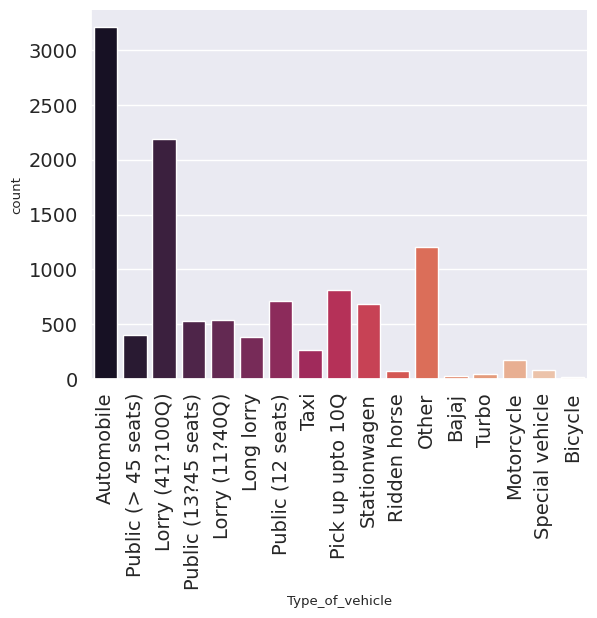

In [328]:
cp=sns.countplot(x=data['Type_of_vehicle'],hue=data['Type_of_vehicle'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
cp.legend_.remove()
sns.despine(top=True,right=True)

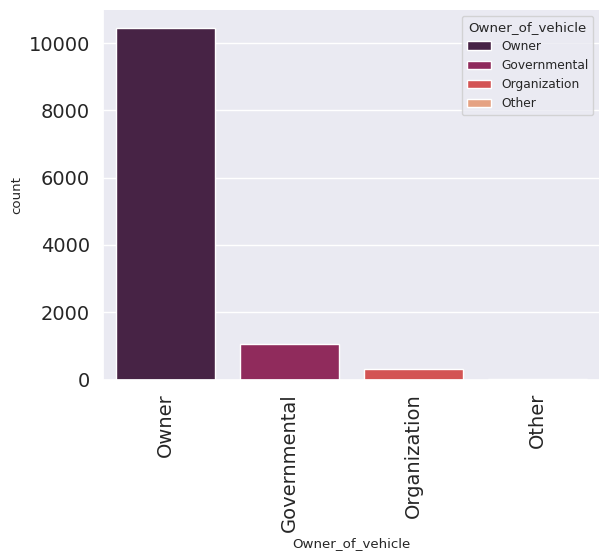

In [329]:
sns.countplot(x=data['Owner_of_vehicle'],hue=data['Owner_of_vehicle'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

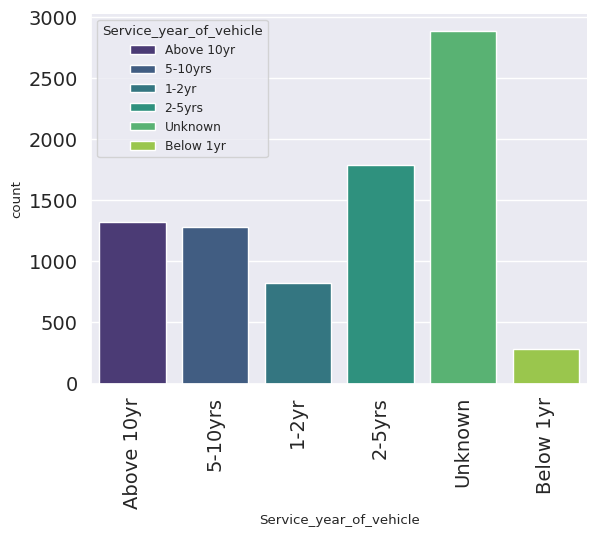

In [330]:
sns.countplot(x=data['Service_year_of_vehicle'],hue=data['Service_year_of_vehicle'],palette='viridis')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

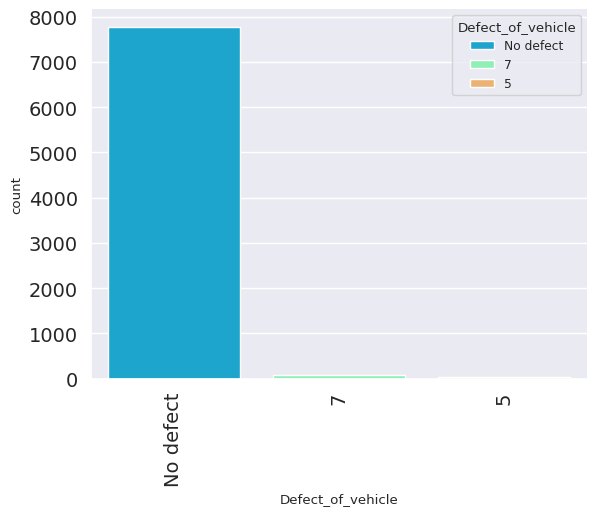

In [331]:
sns.countplot(x=data['Defect_of_vehicle'],hue=data['Defect_of_vehicle'],palette='rainbow')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

Inference on driver details:
* Certain vehicles don't have any defects. But still got accident
* Most of the service_year is unknown

##Casuality

In [332]:
Casualty_class=data['Casualty_class'].value_counts()
Casualty_class

,count
Casualty_class,
Driver or rider,4944
na,4443
Pedestrian,1649
Passenger,1280


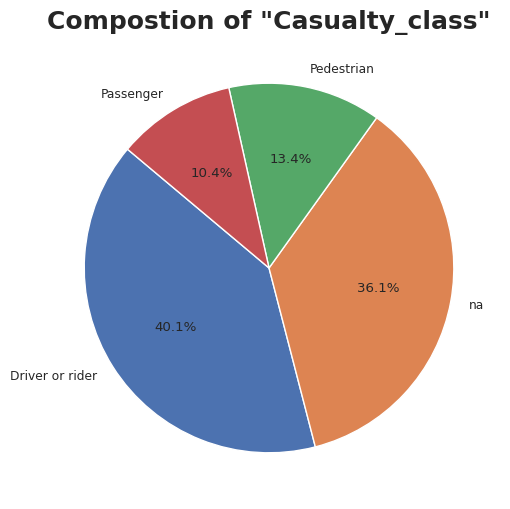

In [333]:
plt.figure(figsize=(8,6))
fig_1=plt.pie(Casualty_class,labels=Casualty_class.index,autopct='%1.1f%%',startangle=140)
plt.title('Compostion of "Casualty_class"',fontsize=18,fontweight='bold')
plt.show()

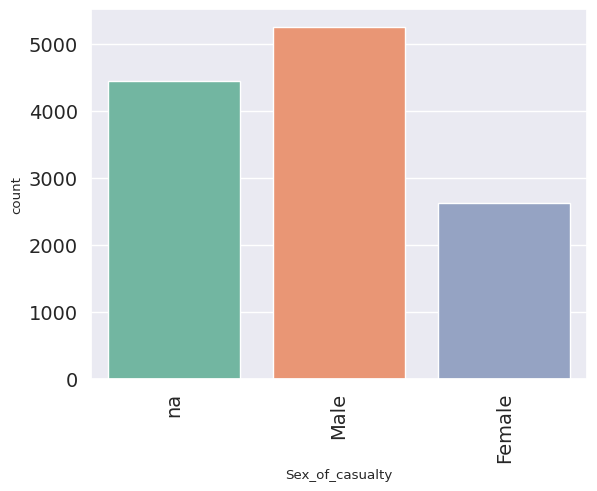

In [334]:
sns.countplot(x=data['Sex_of_casualty'],hue=data['Sex_of_casualty'],palette='Set2')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [335]:
data['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994
5,244


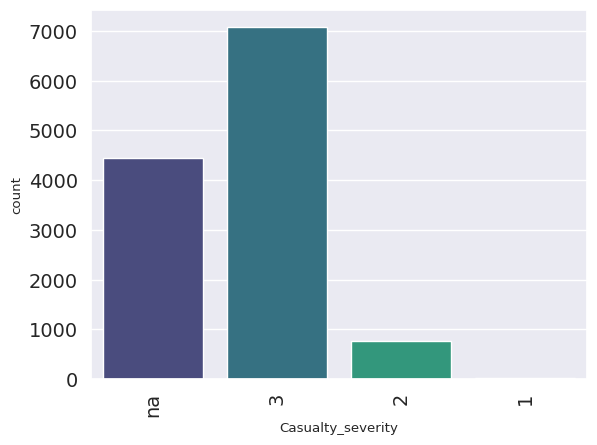

In [336]:
sns.countplot(x=data['Casualty_severity'],hue=data['Casualty_severity'],palette='viridis')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

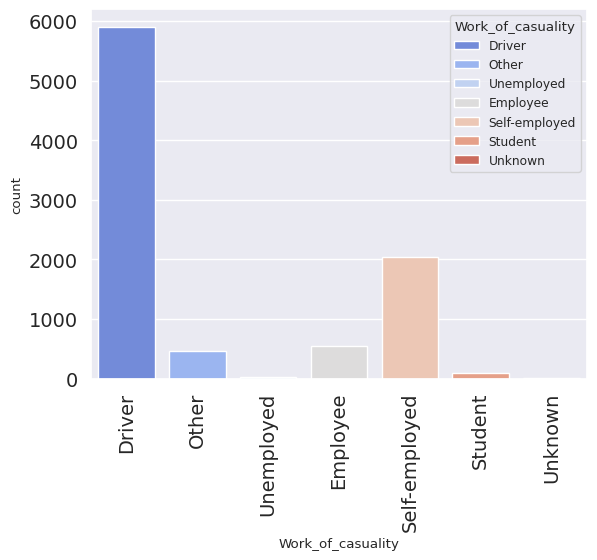

In [337]:
sns.countplot(x=data['Work_of_casuality'],hue=data['Work_of_casuality'],palette='coolwarm')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

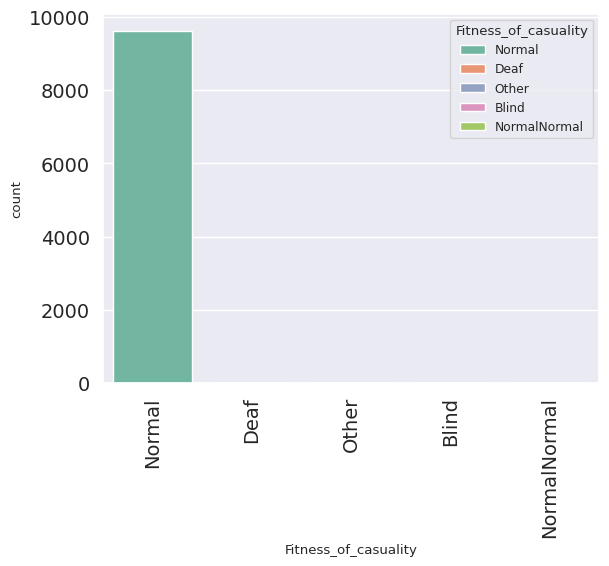

In [338]:
sns.countplot(x=data['Fitness_of_casuality'],hue=data['Fitness_of_casuality'],palette='Set2')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [339]:
data['Number_of_casualties'].value_counts()

,count
Number_of_casualties,
1,8397
2,2290
3,909
4,394
5,207
6,89
7,22
8,8


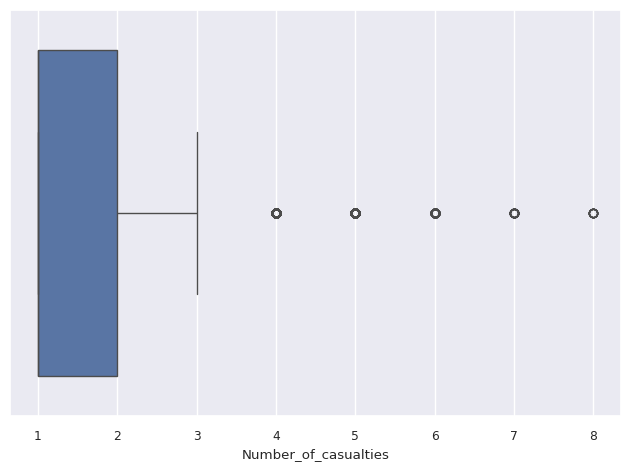

In [340]:
sns.boxplot(x=data['Number_of_casualties'],data=data)
plt.tight_layout()
plt.show()

Inferences on Casuality details:
* Average Casuality number is 1.
* Severity range of casuality is 3.
* Age range is 18-30.
* Most of people are normally fit.Only a few are deaf and blind.
* Male casuality is more compared to female casuality
* Major casuality is driver himself.
* Pedestrians are also more likely affected by the accident.

## Accident Area

In [341]:
data['Area_accident_occured'].value_counts()

,count
Area_accident_occured,
Other,3819
Office areas,3451
Residential areas,2060
Church areas,1060
Industrial areas,456
School areas,415
Recreational areas,327
Outside rural areas,218
Hospital areas,121


In [342]:
data['Lanes_or_Medians'].value_counts()

,count
Lanes_or_Medians,
Two-way (divided with broken lines road marking),4411
Undivided Two way,3796
other,1660
Double carriageway (median),1020
One way,845
Two-way (divided with solid lines road marking),142
Unknown,57


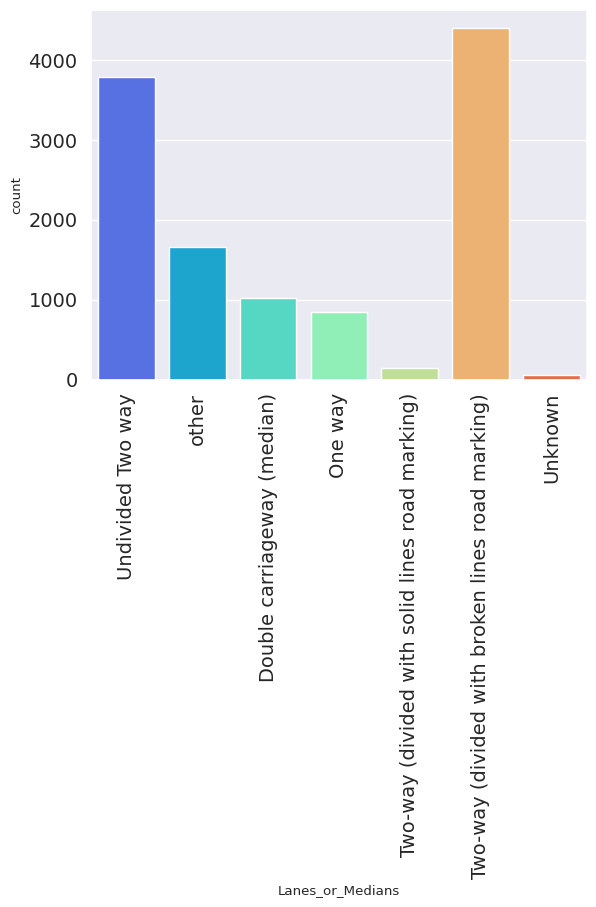

In [343]:
cp=sns.countplot(x=data['Lanes_or_Medians'],hue=data['Lanes_or_Medians'],palette='rainbow')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
cp.legend_.remove()
plt.show()

In [344]:
data['Road_allignment'].value_counts()

,count
Road_allignment,
Tangent road with flat terrain,10459
Tangent road with mild grade and flat terrain,501
Steep grade downward with mountainous terrain,429
Tangent road with mountainous terrain and,396
Gentle horizontal curve,163
Escarpments,113
Sharp reverse curve,57
Tangent road with rolling terrain,37
Steep grade upward with mountainous terrain,19


In [345]:
data['Types_of_Junction'].value_counts()

,count
Types_of_Junction,
Y Shape,4543
No junction,3837
Crossing,2177
Other,445
Unknown,191
O Shape,164
T Shape,60
X Shape,12


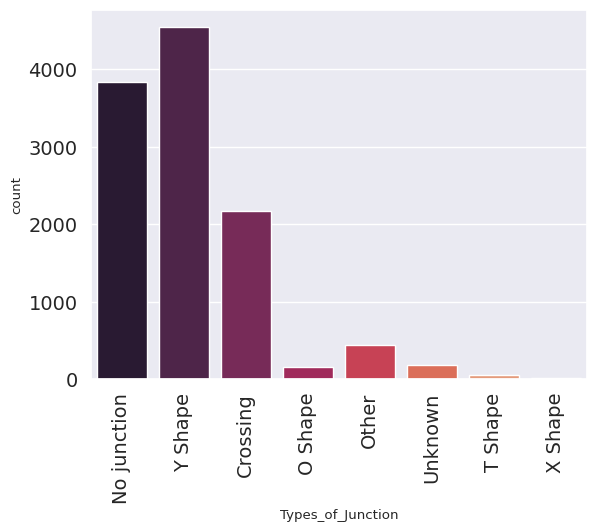

In [346]:
cp=sns.countplot(x=data['Types_of_Junction'],hue=data['Types_of_Junction'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
cp.legend_.remove()
plt.show()

Inference on Accident Area:
* Majority of accidents occured in office areas rather than residential areas.
* Majority of accidents occured in Y type junction and least number of accidents in X type junction

##Road and Weather

In [347]:
data['Road_surface_type'].value_counts()

,count
Road_surface_type,
Asphalt roads,11296
Earth roads,358
Gravel roads,242
Other,167
Asphalt roads with some distress,81


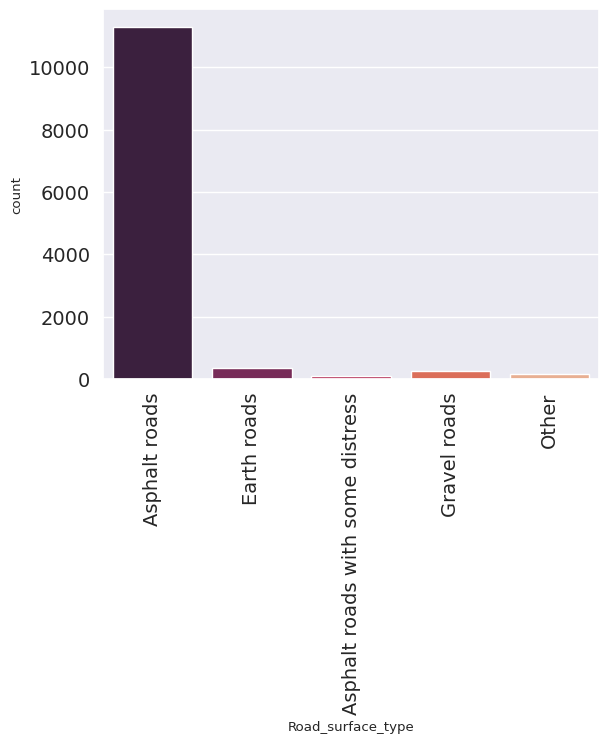

In [348]:
cp=sns.countplot(x=data['Road_surface_type'],hue=data['Road_surface_type'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
cp.legend_.remove()
plt.show()

In [349]:
data['Road_surface_conditions'].value_counts()

,count
Road_surface_conditions,
Dry,9340
Wet or damp,2904
Snow,70
Flood over 3cm. deep,2


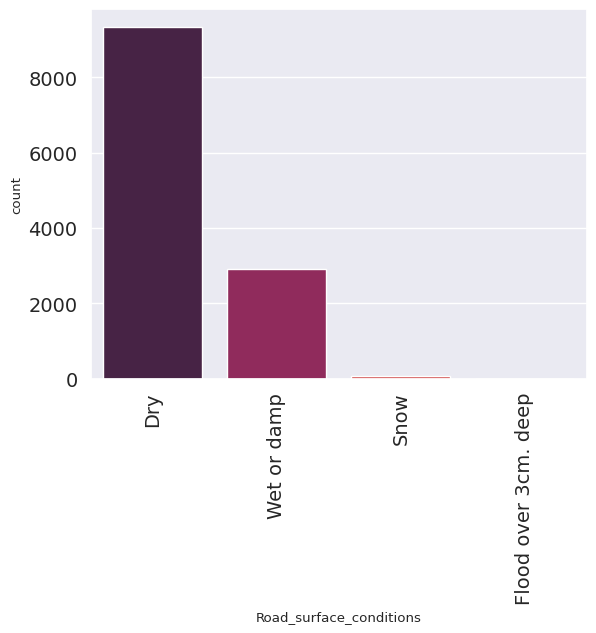

In [350]:
sns.countplot(x=data['Road_surface_conditions'],hue=data['Road_surface_conditions'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [351]:
data['Weather_conditions'].value_counts()

,count
Weather_conditions,
Normal,10063
Raining,1331
Other,296
Unknown,292
Cloudy,125
Windy,98
Snow,61
Raining and Windy,40
Fog or mist,10


Inference on Road features:
* Most of accidents occured at two-way lines in dry surface road.
* Majority of accidents occured in normal day light and in ormal weather condition.


##Collision

In [352]:
data['Type_of_collision'].value_counts()

,count
Type_of_collision,
Vehicle with vehicle collision,8774
Collision with roadside objects,1786
Collision with pedestrians,896
Rollover,397
Collision with animals,171
Collision with roadside-parked vehicles,54
Fall from vehicles,34
Other,26
Unknown,14


In [353]:
data['Number_of_vehicles_involved'].value_counts()

,count
Number_of_vehicles_involved,
2,8340
1,1996
3,1568
4,363
6,42
7,7


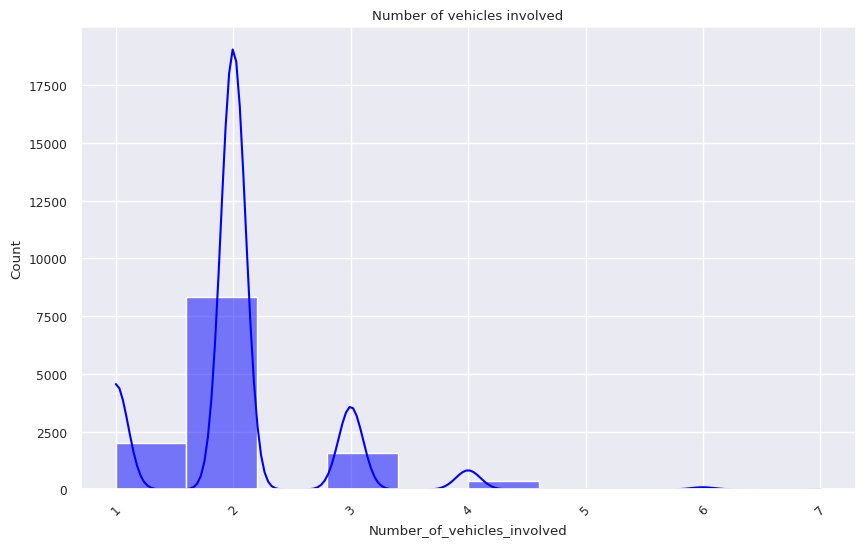

In [354]:
plt.figure(figsize=(10,6))
sns.histplot(data['Number_of_vehicles_involved'],kde=True,bins=10,color='blue')
plt.title('Number of vehicles involved')
plt.xticks(rotation=45)
plt.show()

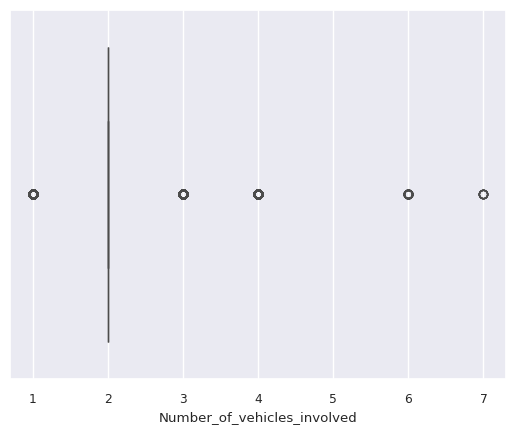

In [355]:
sns.boxplot(x=data['Number_of_vehicles_involved'])
plt.show()

In [356]:
data['Vehicle_movement'].value_counts()

,count
Vehicle_movement,
Going straight,8158
Moving Backward,985
Other,937
Reversing,563
Turnover,489
Getting off,339
Entering a junction,193
Overtaking,96
Unknown,88


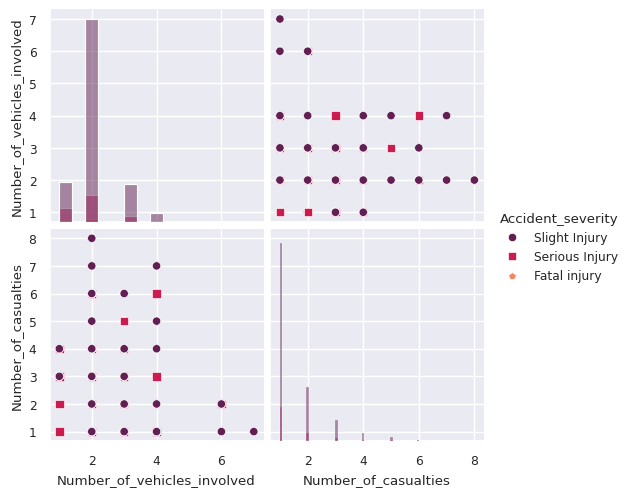

In [357]:
pp=sns.pairplot(data,hue='Accident_severity',markers=["o","s","p"],diag_kind="hist",palette='rocket')
plt.show()

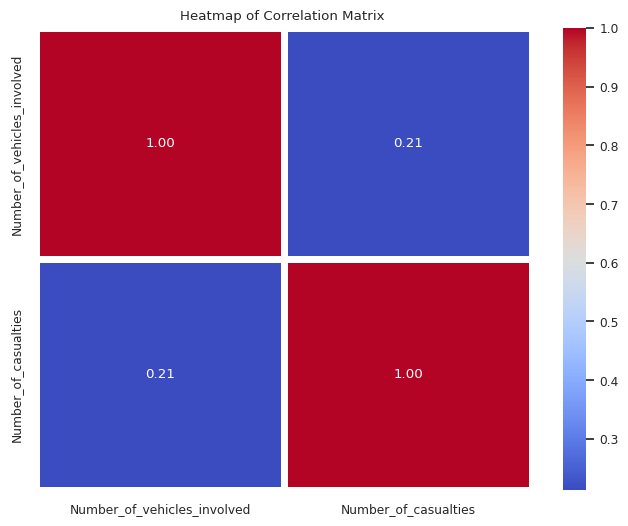

In [358]:
numeric_data=data[['Number_of_vehicles_involved','Number_of_casualties']]
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=5)
plt.title('Heatmap of Correlation Matrix ')
plt.show()

Inference on Type of Collision:
* Majority of accidents occured in vehicle-vehicle collision.
* The number of vehicles involved is 2 in majority of accidents.
* Major cause of accident is not keeping sufficient distance between vehicles and lane changing

##Cause of Accident

In [359]:
data['Pedestrian_movement'].value_counts()

,count
Pedestrian_movement,
Not a Pedestrian,11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,337
Unknown or other,293
Crossing from driver's nearside,140
Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,72
"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)",46
"Walking along in carriageway, back to traffic",18
"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",13
"Walking along in carriageway, facing traffic",7


In [360]:
data['Cause_of_accident'].value_counts()

,count
Cause_of_accident,
No distancing,2263
Changing lane to the right,1808
Changing lane to the left,1473
Driving carelessly,1402
No priority to vehicle,1207
Moving Backward,1137
No priority to pedestrian,721
Other,456
Overtaking,430


Inference:
* Major cause of accident is not keeping sufficient distance between vehicles and lane changing

##Target variable

In [361]:
data['Accident_severity'].value_counts()
#target

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


Inference:
So,the target variable has 3 occassions, where slight injury marks higher

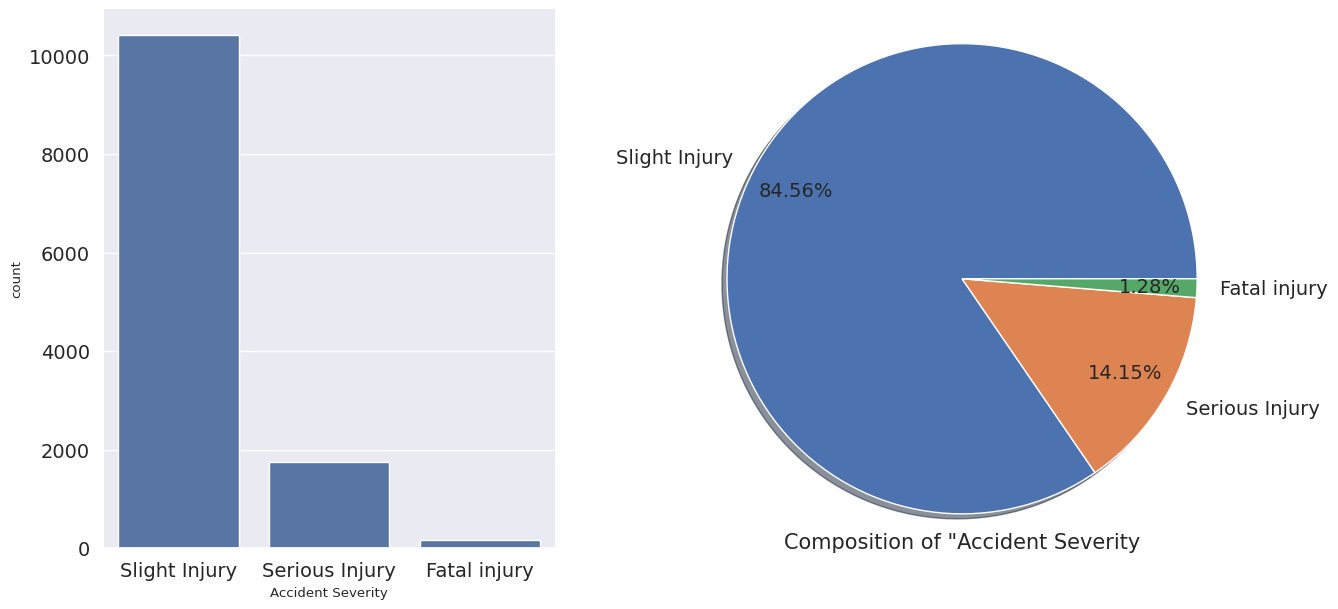

In [362]:
# checking the target - #Univariate Analysis
plt.figure(figsize=(14,7))
# barplot
ax1=plt.subplot(1,2,1)
cp=sns.countplot(x=data['Accident_severity'])
ax1.set_xlabel("Accident Severity")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

# pie chart
ax2=plt.subplot(1,2,2)
plt.pie(x=data['Accident_severity'].value_counts(),
        labels=list(data['Accident_severity'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of "Accident Severity',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

Inference:
1. 84% of accidents led to slight injuries
2. There is large difference between Slight Injuries and Serious Injuries.
3. Only 1.3% o people died in accidents.Instant deaths are less, most people survived with slight injuries and few survived with very serious injuries

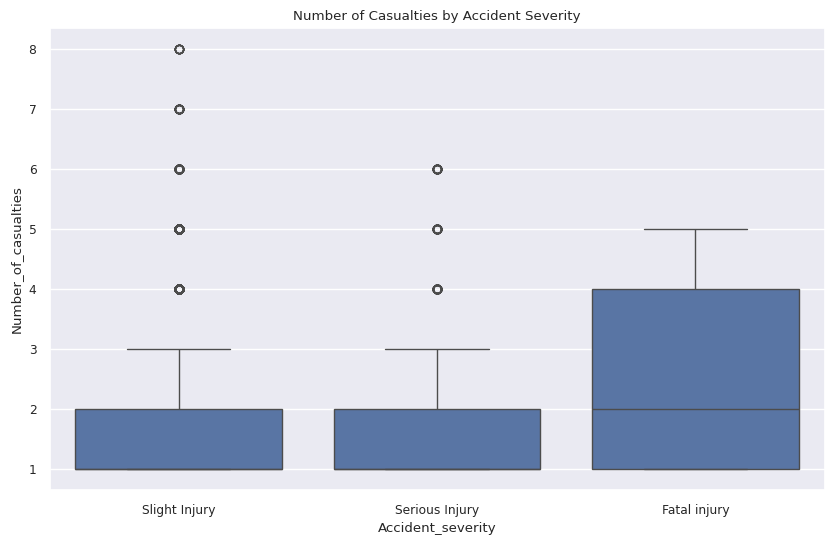

In [363]:
# Bivariate Analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='Accident_severity',y='Number_of_casualties',data=data)
plt.title("Number of Casualties by Accident Severity")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)


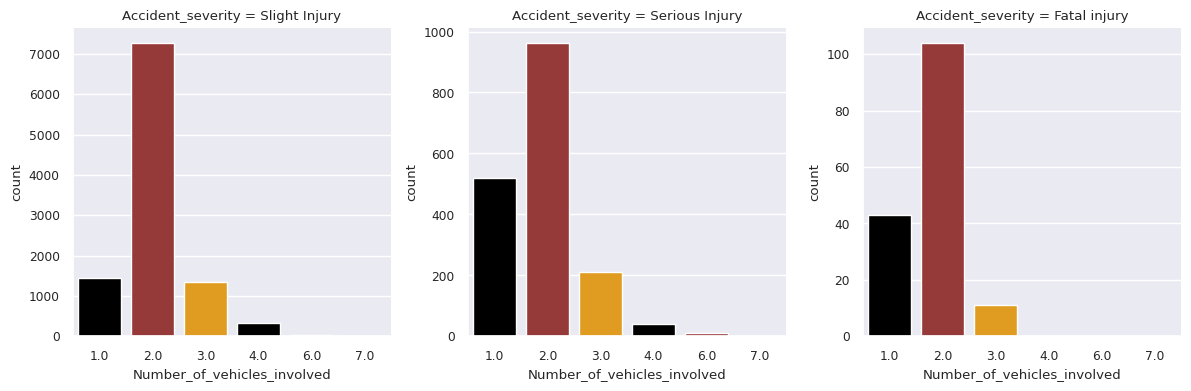

In [364]:
# Creating a facet grid with columns as survived=0 and survived=1
grid=sns.FacetGrid(data=data,col='Accident_severity',height=4,aspect=1,sharey=False)
# Mapping bar plot and the data on to the grid
grid.map(sns.countplot,'Number_of_vehicles_involved',hue=data['Number_of_vehicles_involved'],palette=['black','brown','orange'])
plt.show()

In [365]:
# for col in data.drop('Accident_severity',axis=1):
#   g=sns.FacetGrid(data,col='Accident_severity',height=6,aspect=1,sharey=False)
#   g.map(sns.countplot,col,palette='Dark2')
#   plt.show();

##Categorical data analysis

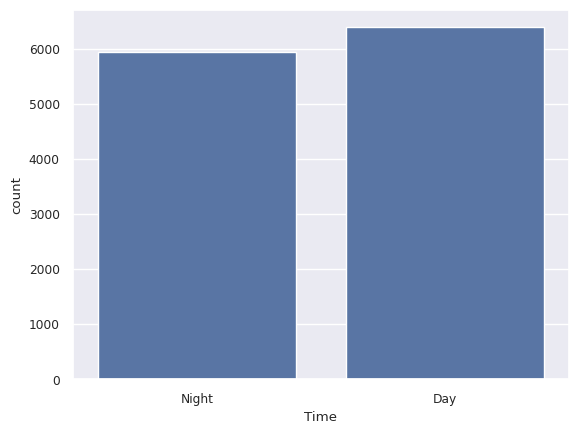

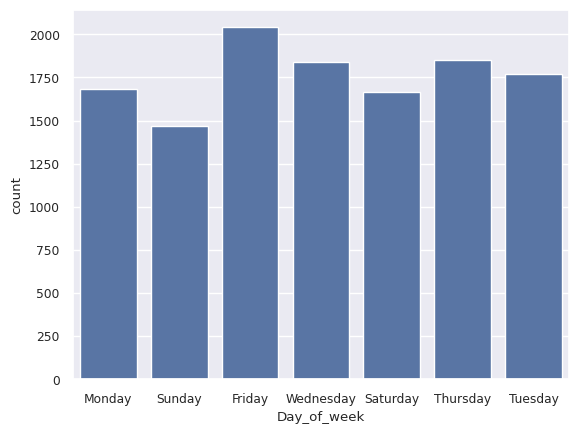

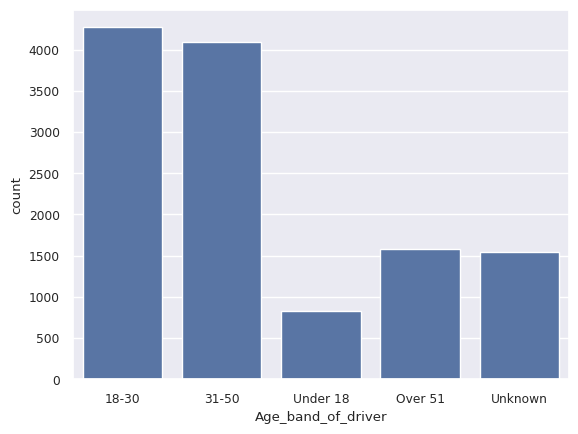

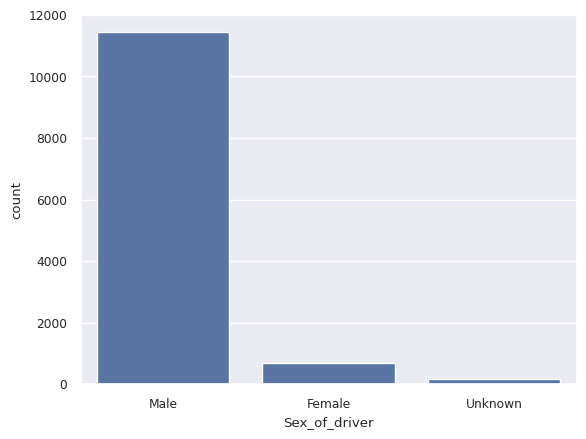

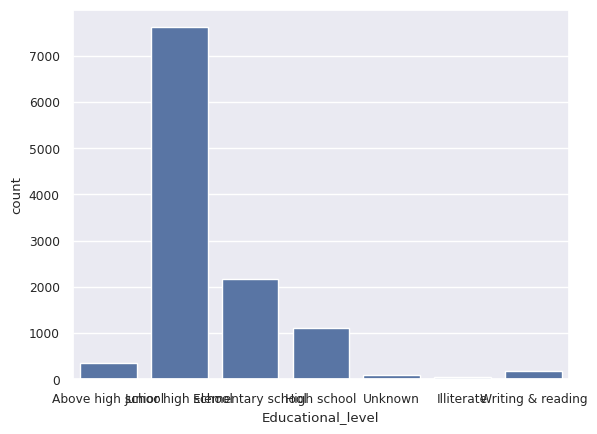

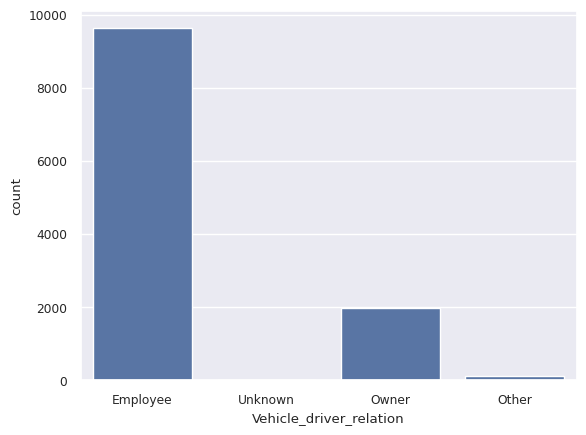

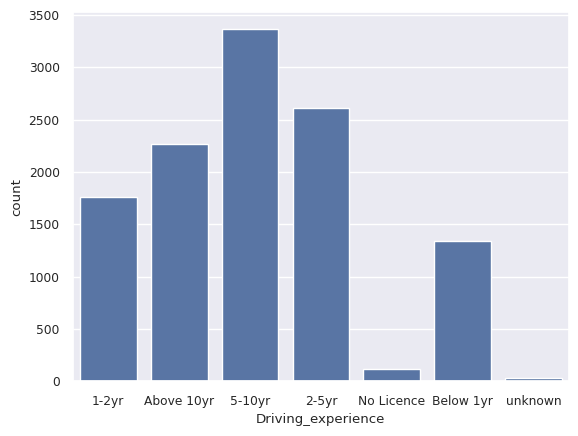

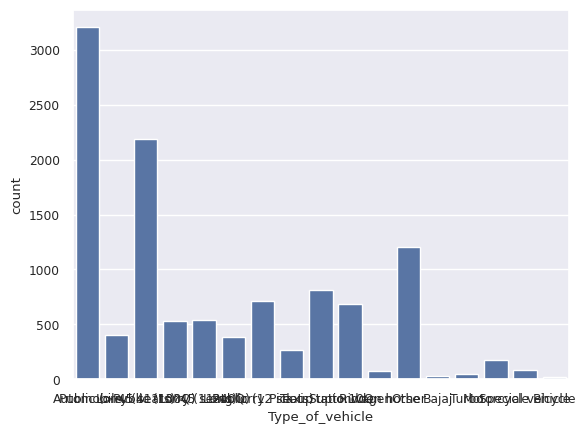

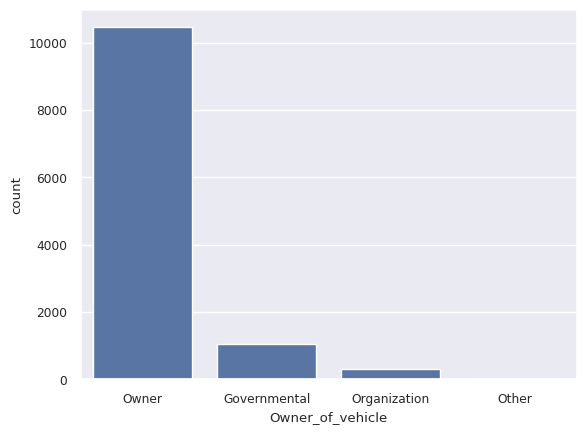

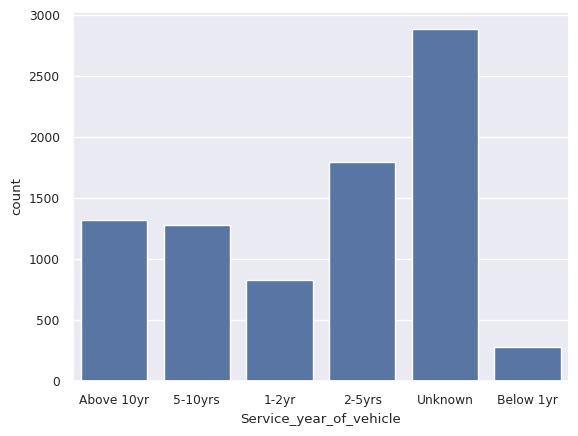

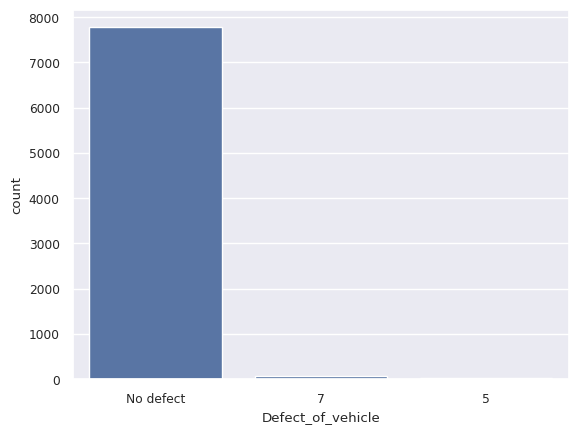

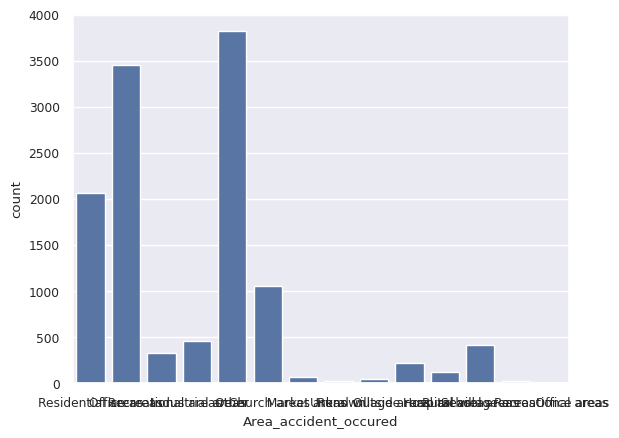

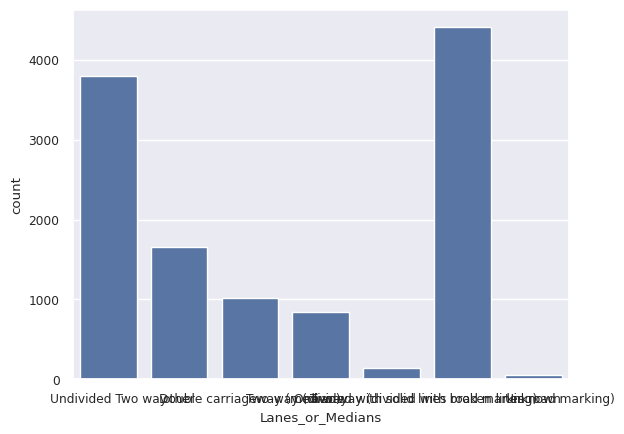

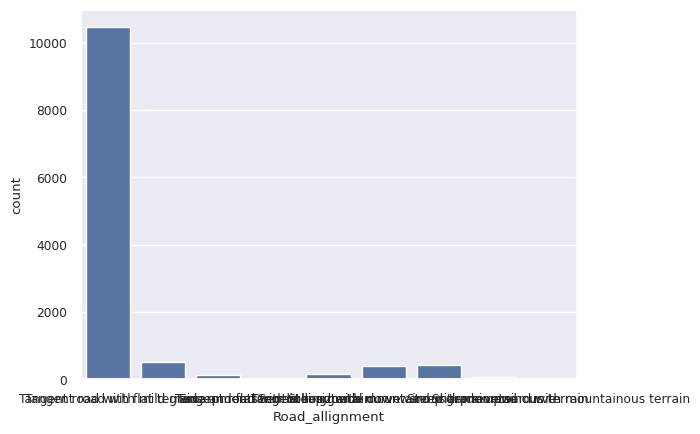

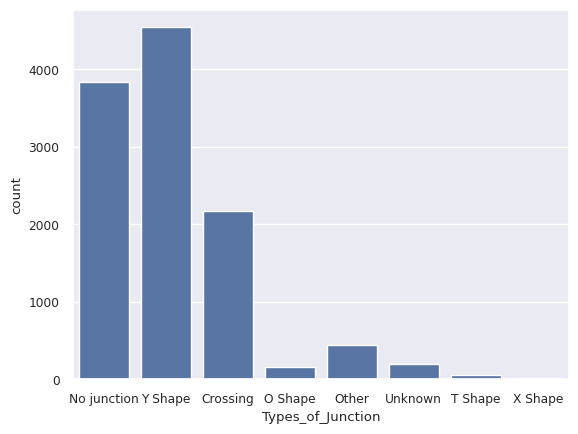

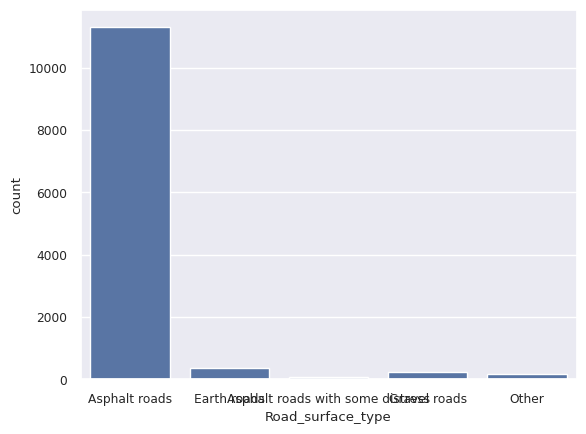

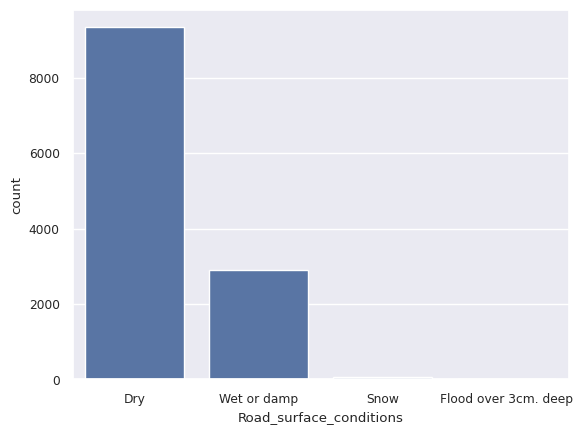

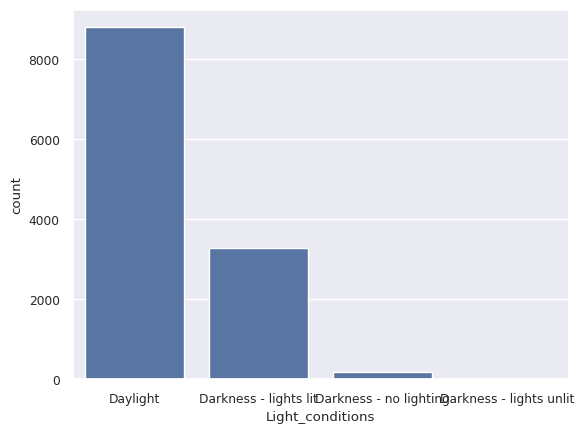

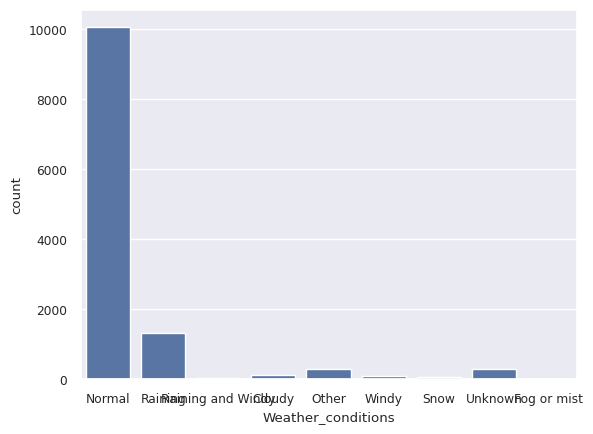

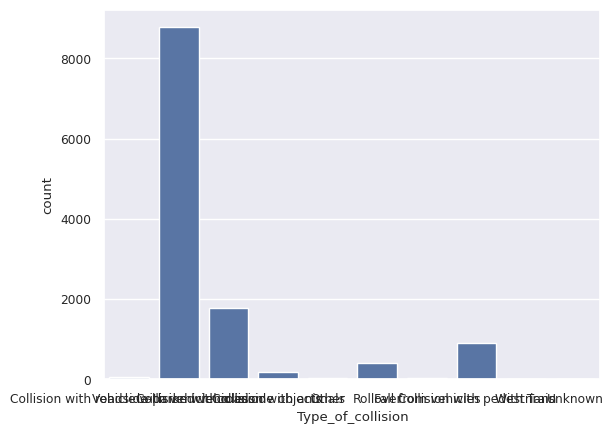

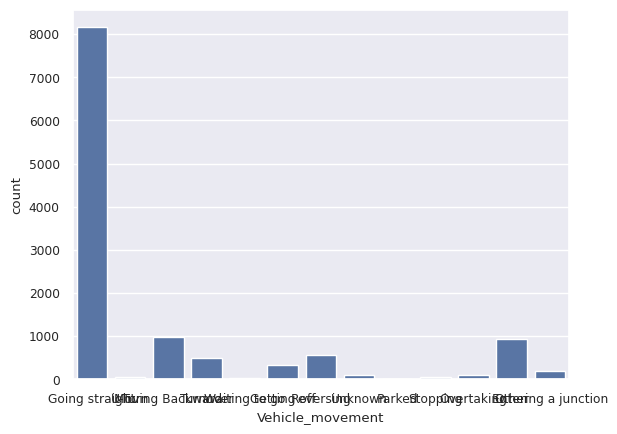

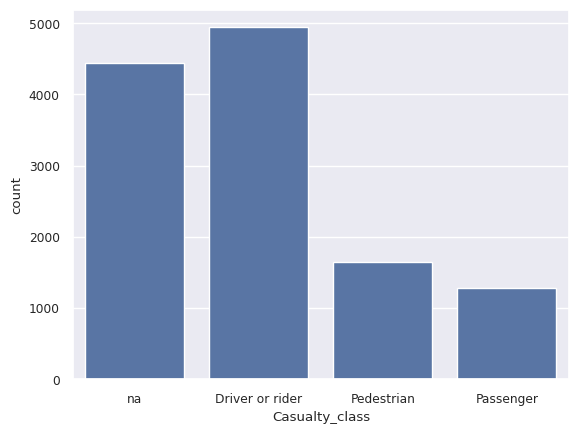

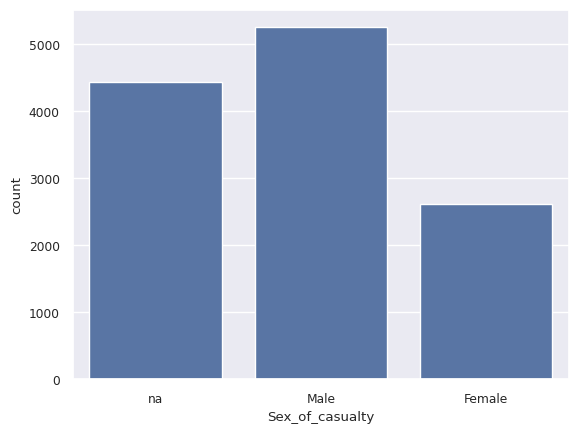

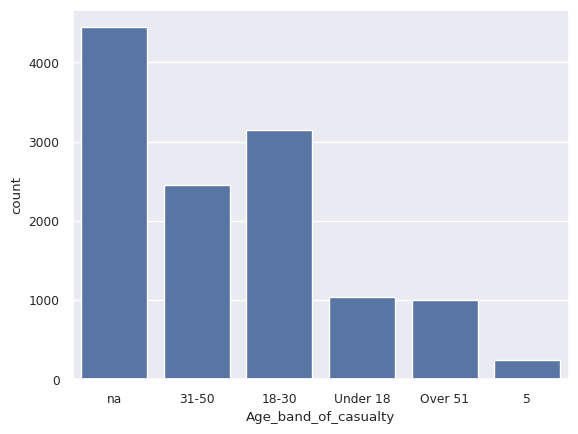

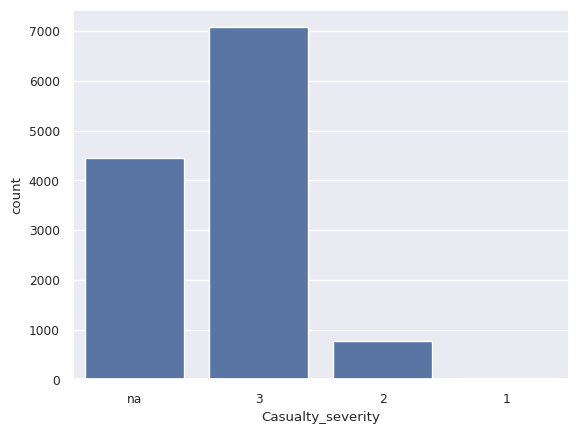

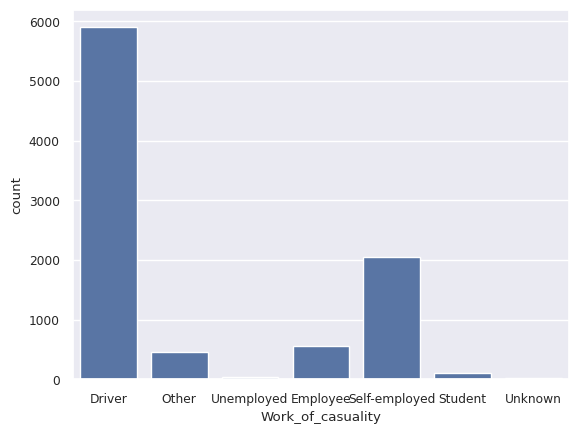

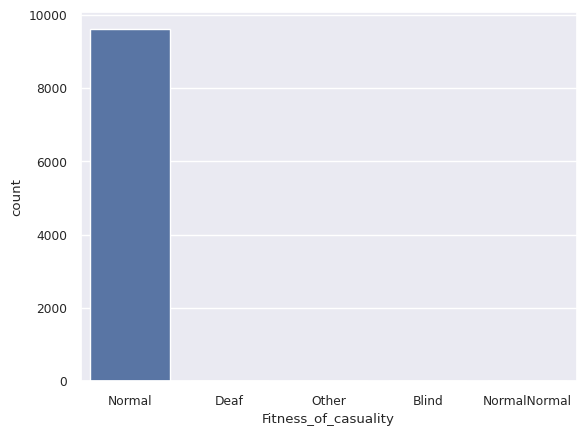

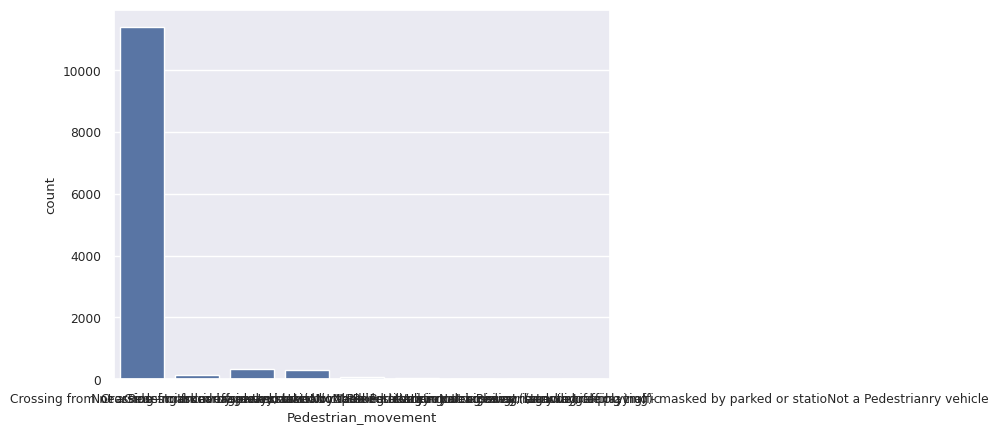

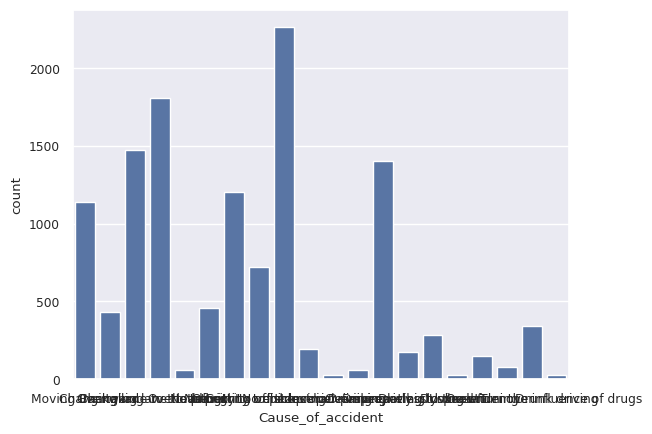

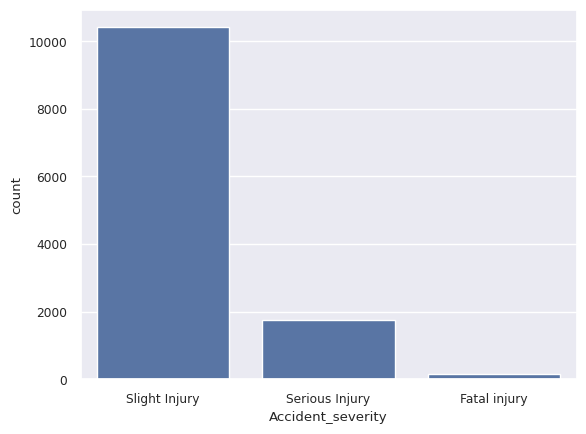

In [366]:
for col in data.select_dtypes(include='object'):
  if data[col].nunique()<=22:
    sns.countplot(x=col,data=data)
    plt.show()

**Observations:**

* Most of the accidents with fatal injuries happened in night.
* Most of the accidents with fatal injuries happened on weekends.
* Fatality occured on saturdays and sundays.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

#Data Cleaning

##Spelling Mistake Handling

In [367]:
# Replacing misspelled vehicle type names

#Lorry
data.loc[(data['Type_of_vehicle']=="Lorry (41?100Q)")|
         (data['Type_of_vehicle']=="Lorry (11?40Q)")|
         (data['Type_of_vehicle']=="Pick up upto 10Q"),
         'Type_of_vehicle']='Lorry'

In [368]:
data['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Lorry,3538
Automobile,3205
Other,1208
Public (12 seats),711
Stationwagen,687
Public (13?45 seats),532
Public (> 45 seats),404
Long lorry,383
Taxi,265


In [369]:
#Public vehicles
data.loc[(data['Type_of_vehicle']=="Public (12 seats)")|
         (data['Type_of_vehicle']=="Public (13?45 seats)")|
         (data['Type_of_vehicle']=="Public (> 45 seats)"),
         'Type_of_vehicle']='Public Vehicles'

In [370]:
data['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Lorry,3538
Automobile,3205
Public Vehicles,1647
Other,1208
Stationwagen,687
Long lorry,383
Taxi,265
Motorcycle,177
Special vehicle,84


In [371]:
data.loc[data['Defect_of_vehicle']=="No defect",'Defect_of_vehicle']="0"

In [372]:
data['Defect_of_vehicle'].value_counts()

,count
Defect_of_vehicle,
0,7777
7,76
5,36


In [373]:
# replacing misspelled Area_accident_occured names

# Rural village areasOffice areas
data.loc[data['Area_accident_occured']=='Rural village areasOffice areas','Area_accident_occured']='Rural village areas or Office areas'

In [374]:
data['Area_accident_occured'].value_counts()

,count
Area_accident_occured,
Other,3819
Office areas,3451
Residential areas,2060
Church areas,1060
Industrial areas,456
School areas,415
Recreational areas,327
Outside rural areas,218
Hospital areas,121


In [375]:
# to_remove 5 in age band of casualty
data=data.drop(data.index[data['Age_band_of_casualty']=='5'])

In [376]:
data['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994


In [377]:
data['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)

<ipython-input-377-a3f1c150367c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)


In [378]:
data['Cause_of_accident'].value_counts()

,count
Cause_of_accident,
No distancing,2211
Changing lane to the right,1775
Changing lane to the left,1454
Driving carelessly,1371
No priority to vehicle,1182
Moving Backward,1113
No priority to pedestrian,706
Other,444
Overtaking,423


In [379]:
from typing import List
def display_cols_value_counts(col_names:List[str]):
  for col_name in col_names:
    print('-'*30)
    print(f"Column: {col_name}")
    print('-'*30)
    print(data[col_name].value_counts())
    print('')
display_cols_value_counts(data.columns)

------------------------------
Column: Time
------------------------------
Time
Day      6252
Night    5820
Name: count, dtype: int64

------------------------------
Column: Day_of_week
------------------------------
Day_of_week
Friday       1992
Thursday     1813
Wednesday    1811
Tuesday      1734
Monday       1652
Saturday     1632
Sunday       1438
Name: count, dtype: int64

------------------------------
Column: Age_band_of_driver
------------------------------
Age_band_of_driver
18-30       4181
31-50       4015
Over 51     1561
Unknown     1515
Under 18     800
Name: count, dtype: int64

------------------------------
Column: Sex_of_driver
------------------------------
Sex_of_driver
Male       11210
Female       684
Unknown      178
Name: count, dtype: int64

------------------------------
Column: Educational_level
------------------------------
Educational_level
Junior high school    7469
Elementary school     2116
High school           1094
Above high school      353
Writing 

## Handling Duplicates

In [380]:
# Detecting duplicates
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
12310,False
12311,False
12312,False
12313,False


* No duplicates in this dataset

##Handling Missing Values

In [381]:
data.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,724
Vehicle_driver_relation,566
Driving_experience,811
Type_of_vehicle,931
Owner_of_vehicle,472
Service_year_of_vehicle,3866


In [382]:
#Columns with missing values
data.isna().sum()[data.isna().sum() != 0]

,0
Educational_level,724
Vehicle_driver_relation,566
Driving_experience,811
Type_of_vehicle,931
Owner_of_vehicle,472
Service_year_of_vehicle,3866
Defect_of_vehicle,4347
Area_accident_occured,234
Lanes_or_Medians,377
Road_allignment,141


In [383]:
# Calculate  the percentage of missing values and round to 2
(data.isna().sum()/data.shape[0]*100).round(2)

,0
Time,0.00
Day_of_week,0.00
Age_band_of_driver,0.00
Sex_of_driver,0.00
Educational_level,6.00
Vehicle_driver_relation,4.69
Driving_experience,6.72
Type_of_vehicle,7.71
Owner_of_vehicle,3.91
Service_year_of_vehicle,32.02


In [384]:
#Fill NaN values with the mode of each column
data.fillna(data.mode().iloc[0],inplace=True)
data.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [385]:
# data['Road_suface_type'].fillna(data['Road_suface_type'].mode()[0],inplace=True)
# data['Road_allignment'].fillna(data['Road_allignment'].mode()[0],inplace=True)

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Service_year_of_vehicle      12072 non-null  object
 10  Defect_of_vehicle            12072 non-null  object
 11  Area_accident_occured        12072 non-null  object
 12  Lanes_or_Medians             12072 non-null  object
 13  Road_allignment              12072 n

##Handling "Unknown" and "na" values

  We can handle all null values. But there are also, "Unknown" and "na" as value in the column which is also equal to null. Have to deal with that too!

In [387]:
# Replace 'Unknown', 'unknown' and 'na' with the mode of each column
def replace_with_mode(df,values_to_replace=['Unknown','unknown','na']):
  for column in df.columns:
    mode_value=df[column].mode()[0] # Get the mode (most frequent value)
    df[column]=df[column].replace(values_to_replace,mode_value)
replace_with_mode(data)
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Night,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Night,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public Vehicles,Owner,5-10yrs,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Night,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public Vehicles,Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [388]:
data.describe(include=['O']).T

,count,unique,top,freq
Time,12072,2,Day,6252
Day_of_week,12072,7,Friday,1992
Age_band_of_driver,12072,4,18-30,5696
Sex_of_driver,12072,2,Male,11388
Educational_level,12072,6,Junior high school,8290
Vehicle_driver_relation,12072,3,Employee,10024
Driving_experience,12072,6,5-10yr,4145
Type_of_vehicle,12072,13,Lorry,4388
Owner_of_vehicle,12072,4,Owner,10726
Service_year_of_vehicle,12072,6,Unknown,6682


In the columns 'Age_band_of_casuality' and 'Service_year_of_vehicle', most of the data points are unknown. So better to drop them.

In [389]:
data=data.drop(['Age_band_of_casualty','Service_year_of_vehicle'],axis=1)

In [390]:
from typing import List
def  display_cols(col_names:List[str]):
  for col_name in col_names:
    print('-'*30)
    print(f"Column: {col_name}")
    print('-'*30)
    print(data[col_name].unique())
display_cols(data.columns)

------------------------------
Column: Time
------------------------------
['Night' 'Day']
------------------------------
Column: Day_of_week
------------------------------
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
------------------------------
Column: Age_band_of_driver
------------------------------
['18-30' '31-50' 'Under 18' 'Over 51']
------------------------------
Column: Sex_of_driver
------------------------------
['Male' 'Female']
------------------------------
Column: Educational_level
------------------------------
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
------------------------------
Column: Vehicle_driver_relation
------------------------------
['Employee' 'Owner' 'Other']
------------------------------
Column: Driving_experience
------------------------------
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
------------------------------
Column: Type_of_v

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

##Converting Categorical variable to Numerical

In [392]:
#Columns of object type
cats_cols=data.columns[data.dtypes=='object']
cats_cols

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

###Ordinal Encoding

Map logical categorical columns using dictionary

In [393]:
data['Sex_of_driver']=data['Sex_of_driver'].map({'Female':0,'Male':1})
data['Time']=data['Time'].map({'Day':1,'Night':0})
data['Age_band_of_driver']=data['Age_band_of_driver'].map({'Under 18':0,'18-30':1,'31-50':2,'Over 51':3})
data['Driving_experience']=data['Driving_experience'].map({'No Licence':0,'Below 1yr':1,'1-2yr':2,'2-5yr':3,'5-10yr':4,'Above 10yr':5})
data['Educational_level']=data['Educational_level'].map({'Illiterate':0,'Writing & reading':1,'Elementary school':2,'Junior high school':3,'High school':4,'Above high school':5})
data['Accident_severity']=data['Accident_severity'].map({'Slight Injury':0,'Serious Injury':1,'Fatal injury':2})
data['Sex_of_casualty']=data['Sex_of_casualty'].map({'Female':0,'Male':1})

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  int64 
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  int64 
 3   Sex_of_driver                12072 non-null  int64 
 4   Educational_level            12072 non-null  int64 
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  int64 
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

###Convert Columns to Integer Type

In [395]:
data['Defect_of_vehicle']=data['Defect_of_vehicle'].astype('int')
data['Casualty_severity']=data['Casualty_severity'].astype('int')

In [396]:
data.dtypes

,0
Time,int64
Day_of_week,object
Age_band_of_driver,int64
Sex_of_driver,int64
Educational_level,int64
Vehicle_driver_relation,object
Driving_experience,int64
Type_of_vehicle,object
Owner_of_vehicle,object
Defect_of_vehicle,int64


### One Hot Encoding - Nominal Data

In [397]:
# Columns of object type
cats_cols=data.columns[data.dtypes=='object']
cats_cols

Index(['Day_of_week', 'Vehicle_driver_relation', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

In [398]:
for col in cats_cols:
  print(col,":",data[col].nunique())

Day_of_week : 7
Vehicle_driver_relation : 3
Type_of_vehicle : 13
Owner_of_vehicle : 4
Area_accident_occured : 13
Lanes_or_Medians : 6
Road_allignment : 9
Types_of_Junction : 7
Road_surface_type : 5
Road_surface_conditions : 4
Light_conditions : 4
Weather_conditions : 8
Type_of_collision : 9
Vehicle_movement : 12
Casualty_class : 3
Work_of_casuality : 6
Fitness_of_casuality : 5
Pedestrian_movement : 9
Cause_of_accident : 18


In [399]:
data=pd.get_dummies(data,columns=['Casualty_class'],prefix=['Casualty_class'],drop_first=False,dtype=int)

In [400]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Casualty_class_Driver or rider,Casualty_class_Passenger,Casualty_class_Pedestrian
0,0,Monday,1,1,5,Employee,2,Automobile,Owner,0,...,1,3,Driver,Normal,Not a Pedestrian,Moving Backward,0,1,0,0
1,0,Monday,2,1,3,Employee,5,Public Vehicles,Owner,0,...,1,3,Driver,Normal,Not a Pedestrian,Overtaking,0,1,0,0
2,0,Monday,1,1,3,Employee,2,Lorry,Owner,0,...,1,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,1,1,0,0
3,0,Sunday,1,1,3,Employee,4,Public Vehicles,Governmental,0,...,0,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0,0,0,1
4,0,Sunday,1,1,3,Employee,3,Lorry,Owner,0,...,1,3,Driver,Normal,Not a Pedestrian,Overtaking,0,1,0,0


### Label Encoding - Nominal Data

* Converting Categorical Feature Values to numerical values using Label Encoding.
* Label Encoding provides values from 1 to N.

In [401]:
cats_cols=data.columns[data.dtypes=='object']
for cats_col in cats_cols:
  le=LabelEncoder()
  data[cats_col]=le.fit_transform(data[cats_col])
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Casualty_class_Driver or rider,Casualty_class_Passenger,Casualty_class_Pedestrian
0,0,1,1,1,5,0,2,0,3,0,...,1,3,0,2,5,8,0,1,0,0
1,0,1,2,1,3,0,5,7,3,0,...,1,3,0,2,5,15,0,1,0,0
2,0,1,1,1,3,0,2,4,3,0,...,1,3,0,2,5,0,1,1,0,0
3,0,3,1,1,3,0,4,7,0,0,...,0,3,0,2,5,1,0,0,0,1
4,0,3,1,1,3,0,3,4,3,0,...,1,3,0,2,5,15,0,1,0,0


# Data Transformations -Numerical Data Analysis

##Outliers

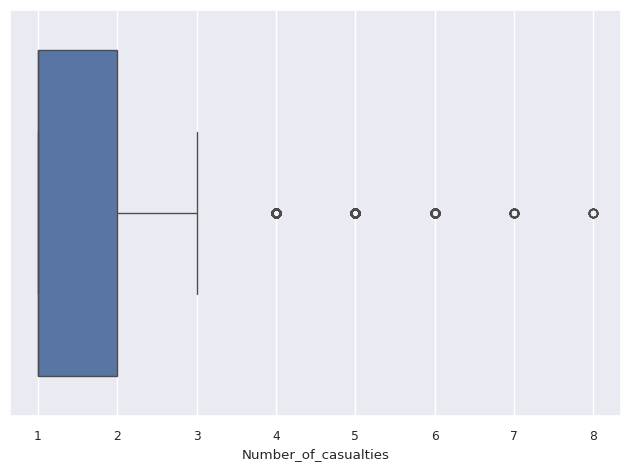

In [402]:
sns.boxplot(x=data['Number_of_casualties'],data=data)
plt.tight_layout()
plt.show()

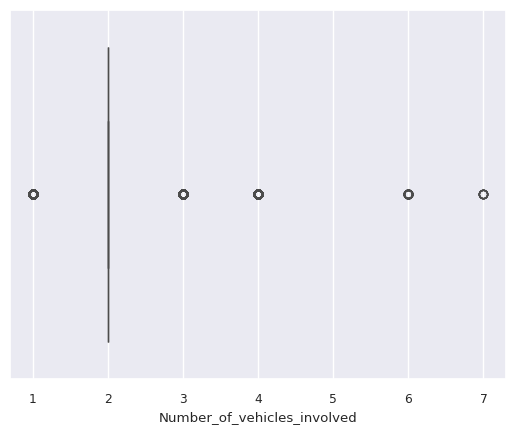

In [403]:
sns.boxplot(x=data['Number_of_vehicles_involved'])
plt.show()

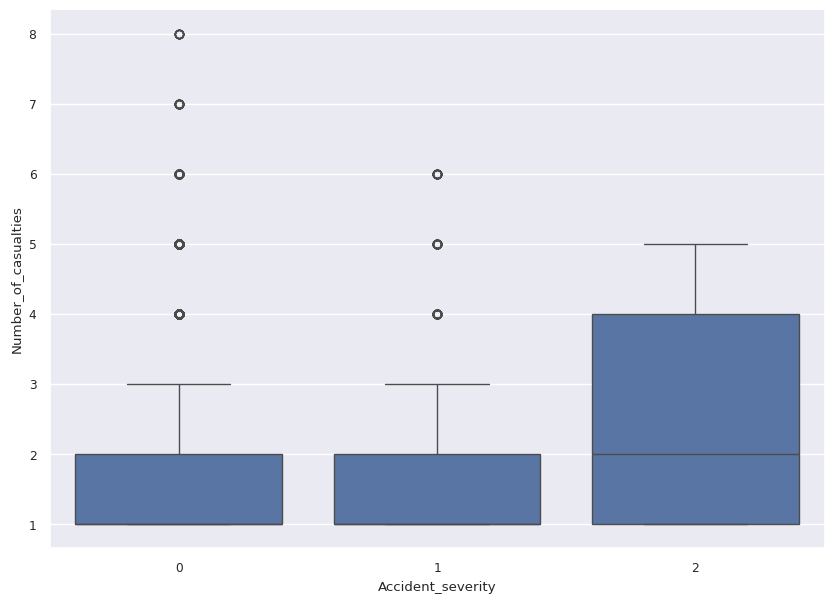

In [404]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x="Accident_severity",y="Number_of_casualties")
plt.show()

since there are only 2 discreate numerical variables(no continuous numerical variables in this data set) we dont drop any outliers here.

#correlation of numerical variables

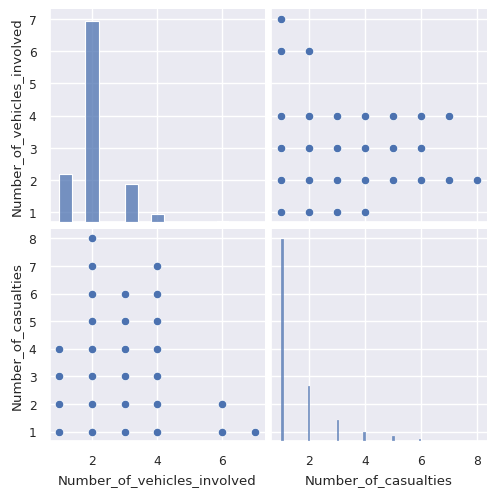

In [405]:
sns.pairplot(data[["Number_of_vehicles_involved","Number_of_casualties"]])

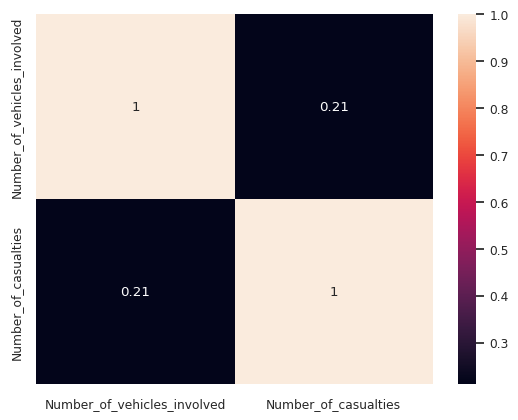

In [406]:
correlation_matrix=data[["Number_of_vehicles_involved",'Number_of_casualties']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

#inference

we really may need "number_of_vehicles_involved"because that might be lead to severity of accident (for example:if numbner of  vehicles is 2 and if lorry and bike collided, then the severity of bike rider is severe,elif bike and bike slight injury, and so on..cases)


1.we may or may not need the "number_of_vehicles_involved",but there is a 1 supporting case, so this may be a useful feature as data cannot be lost if there  is a slight chance of dependency.


2.coming to"number_of_casualities", we really dont consider the number of  patients. as we are aiming for severity of accident.so, we can drop the "number_of_casualities"column.


3. in this heatmap, we can find that  these  are not much etremely correlated variables.

#scaling

no need of scaling here!!!

#non relevant columns

<Axes: >

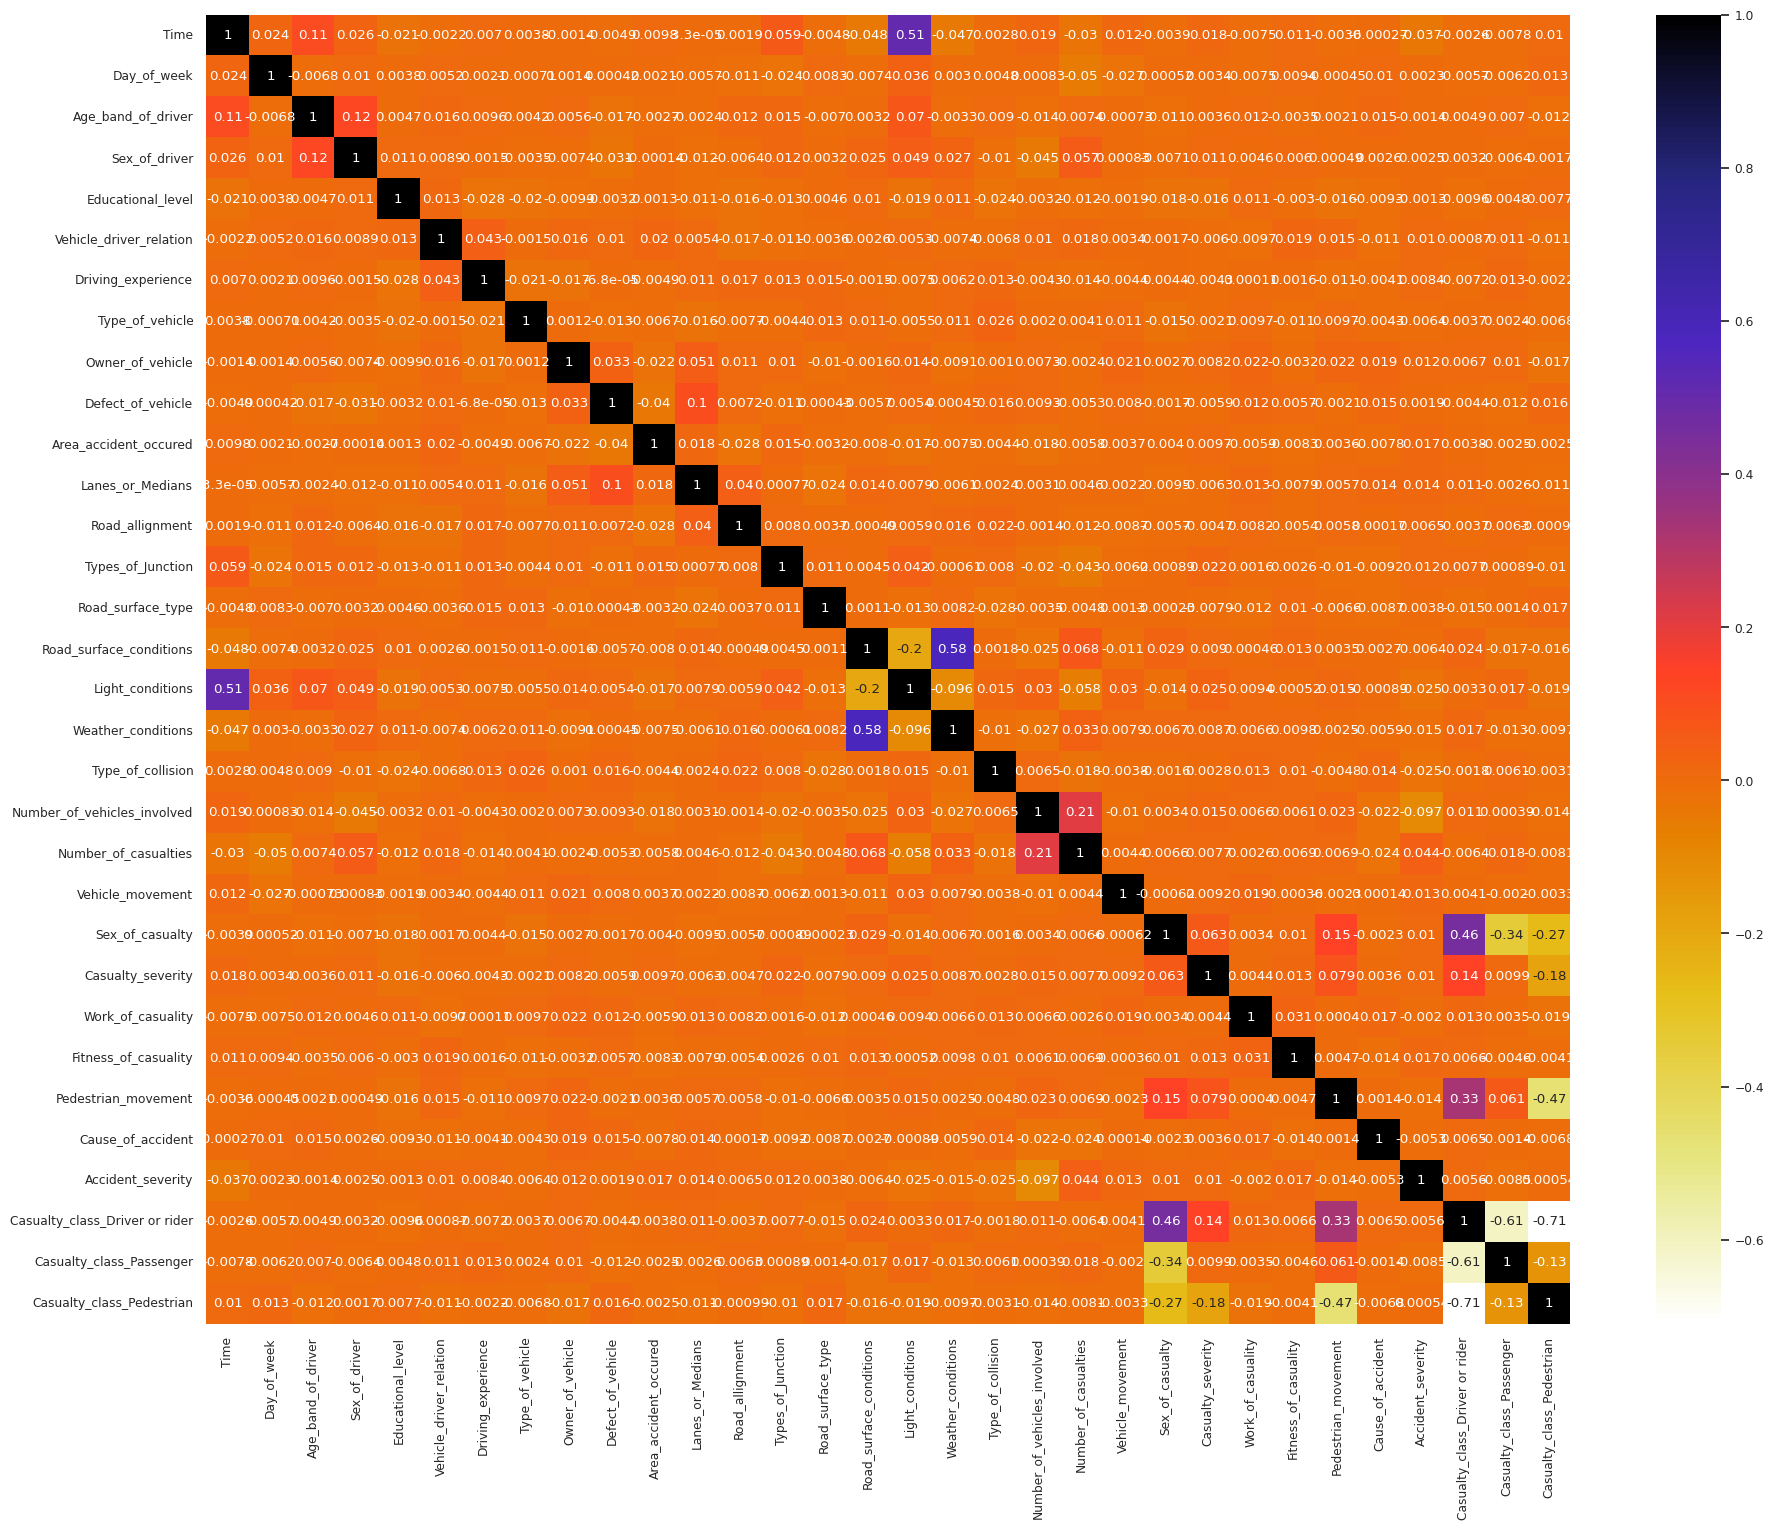

In [407]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)


In [408]:
data.corr()["Accident_severity"].sort_values(ascending=False)

,Accident_severity
Accident_severity,1.000000
Number_of_casualties,0.043857
Area_accident_occured,0.017143
Fitness_of_casuality,0.017116
Lanes_or_Medians,0.013666
Vehicle_movement,0.012717
Owner_of_vehicle,0.011701
Types_of_Junction,0.011552
Casualty_severity,0.010430
Vehicle_driver_relation,0.010143


**Observing useful features:**

As from the data, we are classifying the severity of accident happened.
1. So, we really dont need the date and time of particular instance. So, they can be left out.
2. Age_band_of_driver really would be an important feature, as the age signifes the immunity of patient. If the patient is older human (>50 or >60), his immunity levels are not so high so the injuries/recovering wont happen so easily. So, we can consider this.

3. Sex_of_driver, can be considered.

4. Educational_level doesn't really matter, while we are focussing on accident severity. We really dont think of educational_level when an accident happened to the person, we check for his condition. Whether he is educated or un-educated, the severity of accident wont show any kindness to the person. so, we can drop this.
5. Vehicle_driver_relation too doesnt matter, as we dont need whether he is a owner of it or not.

6. Driving_experience it may be useful, so we can consider
7. Type_of_vehicle it may be useful, suppose if it is a lorry, we can try to conclude the severity of accident.

8. Owner_of_vehicle, can be left out as we dont do any thing with owner.

9. Service_year_of_vehicle, this feature can be helpful as it specifies the condition of vehicle.

10. Defect_of_vehicle, can be considered for the condition as of "Service_year_of_vehicle".

11. Area_accident_occured, dont really matter the severity really depends on collision of two/three vehicles or other irrespective of place.

12. Lanes_or_medians,Road_alignment,Types_of_junction can be considered.


13. Road_surface_type, may be helpful in resulting of severity. Suppose, if the patient would fall from large distances or from highway which is at a height to normal layout road.

14. Road_surface_conditions, can be considered like "Road_surface_type".

15. Light_conditions and Weather_conditions can be considered because this may result in accidents.


16. Type_of_collision, can be considered.

17. Vehilce_movement, may be helpful.

18. Causalty_class, may be useful.

19. Sex_of_casualty, can be dropped.

20. Age_band_of_casulity, can be considered.

21. Casuality_severity, can be considered.

22. Work_of_casuality, can be dropped as we dont need any inferences from the patient's work.

23. Fitness_of_casuality, can be considered.

24. Pedestrian_movement, can be dropped.

25. Cause_of_accident, can be considered. It is an important feature.

#model building

In [409]:
x=data.drop(["Accident_severity"],axis=1)
y=data["Accident_severity"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("shape of  training features:",x_train.shape)
print("shape of training target:",y_train.shape)
print("shape of testing features:",x_test.shape)
print("shape of testing target:",y_test.shape)


shape of  training features: (9657, 31)
shape of training target: (9657,)
shape of testing features: (2415, 31)
shape of testing target: (2415,)


#best classification model

training and evaluating logistic regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.8489

Classification_report(y_test,y_pred)
training and evaluating decision tree...
Accuracy:0.7362

Classification_report(y_test,y_pred)
training and evaluating random forest...
Accuracy:0.8484

Classification_report(y_test,y_pred)
training and evaluating k-nearest neighbors...
Accuracy:0.8348

Classification_report(y_test,y_pred)
training and evaluating support vector machine...
Accuracy:0.8489

Classification_report(y_test,y_pred)
training and evaluating extra trees...
Accuracy:0.8513

Classification_report(y_test,y_pred)


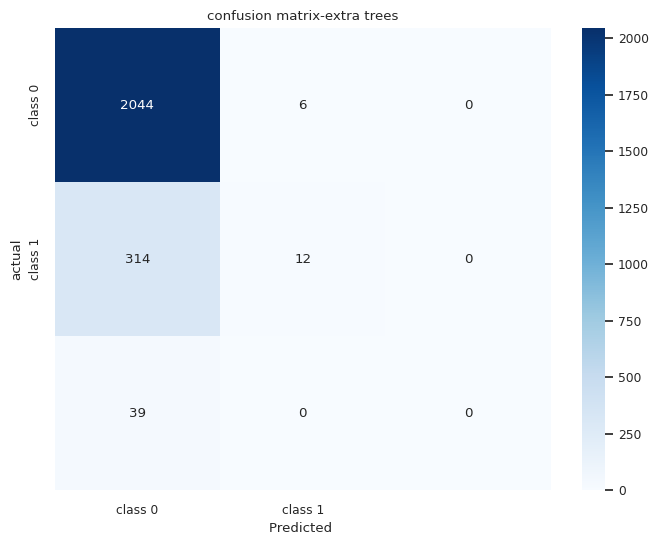

--------------------------------------------------------------------------------


<ipython-input-410-a794f5acac7d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names,y=accuracy,palette="viridis")


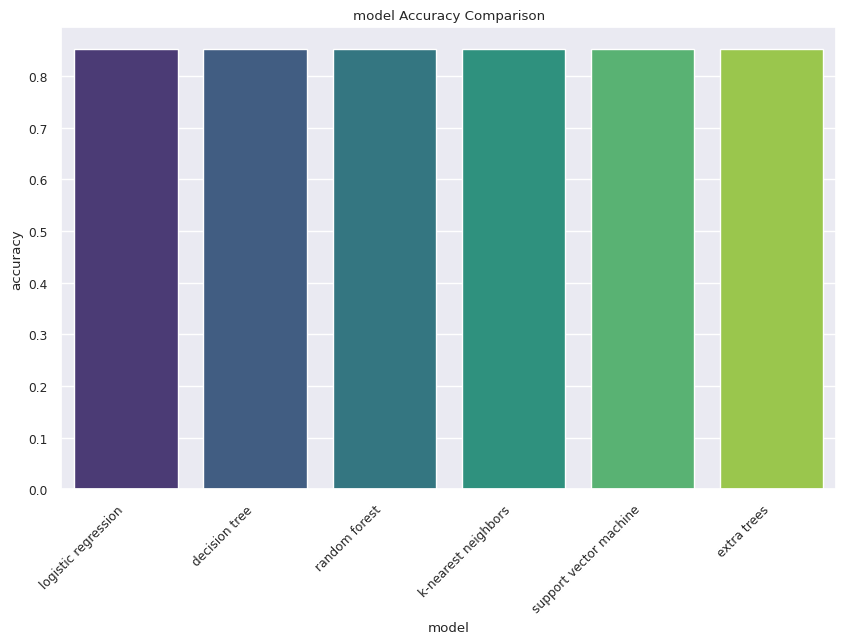

In [410]:
#define models to evaluate
models={
    "logistic regression":LogisticRegression(),
    "decision tree":DecisionTreeClassifier(),
    "random forest":RandomForestClassifier(),
    "k-nearest neighbors":KNeighborsClassifier(),
    "support vector machine":SVC(kernel="linear",probability=True),
    "extra trees":ExtraTreesClassifier()
}
#initialize a list to store  model names and accuracies
model_accuracies=[]
#loop through models, train, and evaluate
for model_name,model in models.items():
   print(f"training and evaluating {model_name}...")
   model.fit(x_train,y_train)
   y_pred=model.predict(x_test)
   accuracy=accuracy_score(y_test,y_pred)
   model_accuracies.append((model_name,accuracy))
   print(f"Accuracy:{accuracy:.4f}")
   print("\nClassification_report(y_test,y_pred)")
   #confusion matrix
   conf_matrix=confusion_matrix(y_test,y_pred)
  #plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["class 0", "class 1"],yticklabels=["class 0", "class 1"])
plt.xlabel("Predicted ")
plt.ylabel("actual")
plt.title(f"confusion matrix-{model_name}")
plt.show()
#seperate a line for readabilitty between models
print("-" * 80)
#plotting the accuracies of all models
model_names=[model_name for model_name,_ in model_accuracies]
accuracies=[accuracy for accuracy in model_accuracies]
plt.figure(figsize=(10,6))
sns.barplot(x=model_names,y=accuracy,palette="viridis")
plt.title("model Accuracy Comparison")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.xticks(rotation=45, ha='right')
plt.show()

#fi-score

one can combine precision and recall into one score,which is called the f-score . the f-score is computed with the hormonic mean of precision and recall.note that is assigns much more weight to low values.as a result of that the classifier will only get a high f-score, if both recall and precision are nigh

In [412]:
#Apply oversampling (smote)
print("training and evaluating logistic regression with oversampling(SMOTE)...")
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
#train model on resampled data
model.fit(x_train_resampled,y_train_resampled)
#predictions
y_pred_oversample=model.predict(x_test)
#Accuracy
accuracy_oversample=accuracy_score(y_test,y_pred_oversample)
print(f"accuracy (oversampling - SMOTE):{accuracy_oversample:.4f}")

#classification report
print("\nClassification_report(oversampling - SMOTE):")
print(classification_report(y_test,y_pred))

training and evaluating logistic regression with oversampling(SMOTE)...
accuracy (oversampling - SMOTE):0.8228

Classification_report(oversampling - SMOTE):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.67      0.04      0.07       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.51      0.34      0.33      2415
weighted avg       0.81      0.85      0.79      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


pickle file

In [413]:
import pickle
from sklearn.tree import DecisionTreeClassifier
#train the model (assuming x_train and y_train are already defined)
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
#save the trained model using pickle
with open("decision_tree_model.pkl","wb") as file:
  pickle.dump(model,file)
  print("model saved to 'decision_tree_model.pkl'.")

model saved to 'decision_tree_model.pkl'.
